# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Loading Dataset

We use pandas to read the dataset and preprocess it.

In [4]:
customerchurn_data = pd.read_csv('Customer_Churn.csv')

In [5]:
customerchurn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
customerchurn_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
customerchurn_data.shape

(7043, 21)

We have 2 types of features in the dataset: categorical (two or more values and without any order) and numerical. Most of the feature names are self-explanatory, except for:

Partner: whether the customer has a partner or not (Yes, No),
Dependents: whether the customer has dependents or not (Yes, No),
OnlineBackup: whether the customer has online backup or not (Yes, No, No internet service),
tenure: number of months the customer has stayed with the company,
MonthlyCharges: the amount charged to the customer monthly,
TotalCharges: the total amount charged to the customer.

There are 7043 customers in the dataset and 19 features without customerID (non-informative) and Churn column (target variable). Most of the categorical features have 4 or less unique values.

In [8]:
customerchurn_data.size

147903

In [9]:
customerchurn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
customerchurn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

data = {'Column Name': ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                        'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
        'Description': ['Customer ID', 'Customer gender (Male/Female)', 'Whether the customer is a senior citizen or not (1, 0)', 'Whether the customer has a partner or not (Yes, No)', 'Whether the customer has dependents or not (Yes, No)', 'Number of months the customer has stayed with the company', 'Whether the customer has a phone service or not (Yes, No)', 'Whether the customer has multiple lines or not (Yes, No, No phone service)', 'Customer’s internet service provider (DSL, Fiber optic, No)', 'Whether the customer has online security or not (Yes, No, No internet service)', 'Whether the customer has online backup or not (Yes, No, No internet service)', 'Whether the customer has device protection or not (Yes, No, No internet service)', 'Whether the customer has tech support or not (Yes, No, No internet service)', 'Whether the customer has streaming TV or not (Yes, No, No internet service)', 'Whether the customer has streaming movies or not (Yes, No, No internet service)', 'The contract term of the customer (Month-to-month, One year, Two year)', 'Whether the customer has paperless billing or not (Yes, No)', 'Payment method of the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))', 'The amount charged to the customer monthly', 'The total amount charged to the customer', 'Whether the customer churned or not (Yes or No)']}

df = pd.DataFrame(data)

In [12]:
from IPython.display import display

display(df)

,Column Name,Description
0,customerID,Customer ID
1,gender,Customer gender (Male/Female)
2,SeniorCitizen,"Whether the customer is a senior citizen or not (1, 0)"
3,Partner,"Whether the customer has a partner or not (Yes, No)"
4,Dependents,"Whether the customer has dependents or not (Yes, No)"
5,tenure,Number of months the customer has stayed with the company
6,PhoneService,"Whether the customer has a phone service or not (Yes, No)"
7,MultipleLines,"Whether the customer has multiple lines or not (Yes, No, No phone service)"
8,InternetService,"Customer’s internet service provider (DSL, Fiber optic, No)"
9,OnlineSecurity,"Whether the customer has online security or not (Yes, No, No internet service)"


In [13]:
#check information about column
customerchurn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
customerchurn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# No duplicates.
customerchurn_data.duplicated().sum()

0

In [16]:
customerchurn_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

Totalcharges is given as object datatype but it is float datatype.

In [17]:
df_copy = customerchurn_data.copy()

In [18]:
df_copy.TotalCharges = None
df_copy.TotalCharges=df_copy.TotalCharges.astype(float)

In [19]:
df_copy.TotalCharges.dtype

dtype('float64')

Issue: Many rows of total charges do not equal each tenures times monthly charges

Define: give them the values of each tenures times monthly charges

In [20]:
df_copy.TotalCharges = df_copy.tenure * df_copy.MonthlyCharges

In [21]:
df_copy[df_copy.tenure * df_copy.MonthlyCharges != df_copy.TotalCharges].shape

(0, 21)

Dropped customerID because it is not needed

In [22]:
# Drop customerID column
df_copy = df_copy.drop('customerID', axis=1)

In [23]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [26]:
df_copy[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.581350
std,24.559481,30.090047,2264.729447
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,394.000000
50%,29.000000,70.350000,1393.600000
75%,55.000000,89.850000,3786.100000
max,72.000000,118.750000,8550.000000


# Outliers Analysis with IQR Method

In [27]:
x = ['tenure','MonthlyCharges','TotalCharges']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df_copy,i)

No outliers in tenure
No outliers in MonthlyCharges
No outliers in TotalCharges


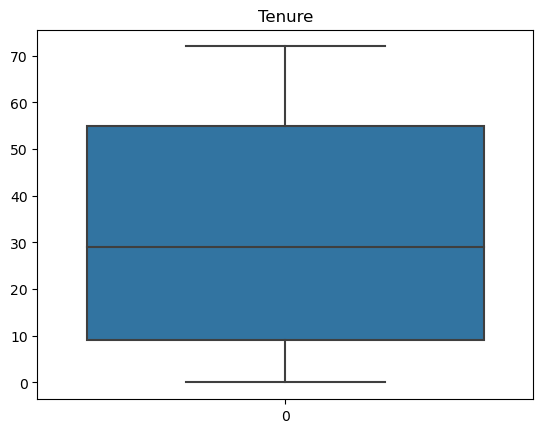

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# create boxplot with wider width
sns.boxplot(data = df_copy['tenure'])

# set plot title and axis labels
plt.title("Tenure")

# show plot
plt.show()

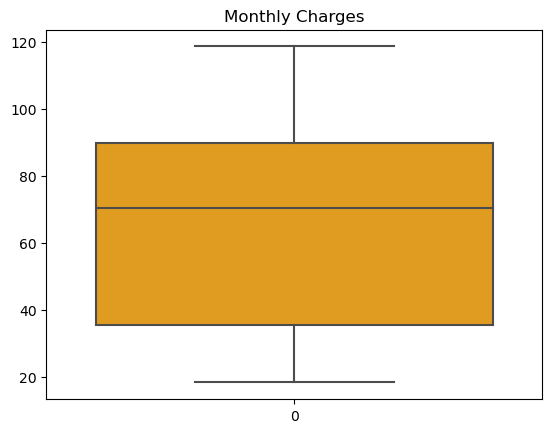

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# create boxplot with wider width
sns.boxplot(data = df_copy['MonthlyCharges'],color='orange')

# set plot title and axis labels
plt.title("Monthly Charges")

# show plot
plt.show()

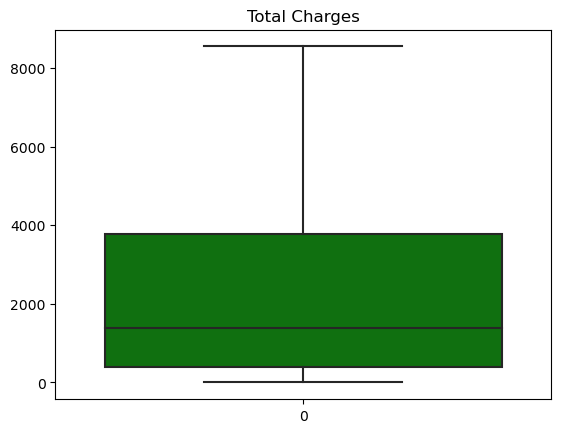

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# create boxplot with wider width
sns.boxplot(data = df_copy['TotalCharges'],color='green')

# set plot title and axis labels
plt.title("Total Charges")

# show plot
plt.show()

# Data visulization

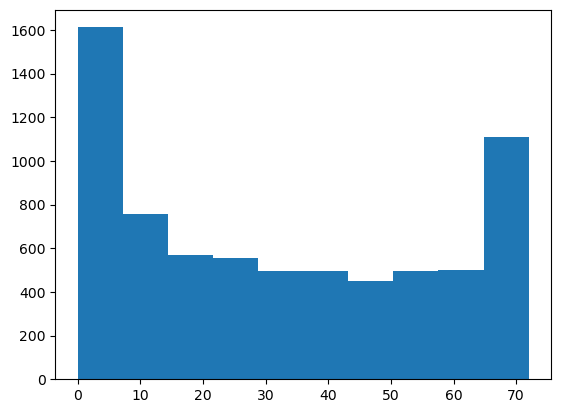

In [31]:
# show the distribution of tenure.
plt.hist(data = customerchurn_data, x = 'tenure');

This is not a normal distribution, and with two peaks, which means there are likely two different kinds of groups of people, and either of them love particular services.

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>,
       <AxesSubplot:title={'center':'TotalCharges'}>], dtype=object)

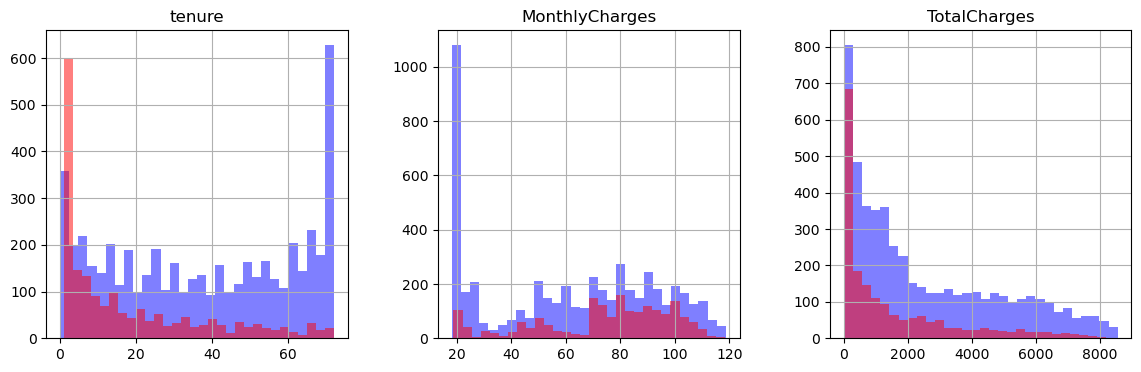

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df_copy[df_copy.Churn == "No"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df_copy[df_copy.Churn == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

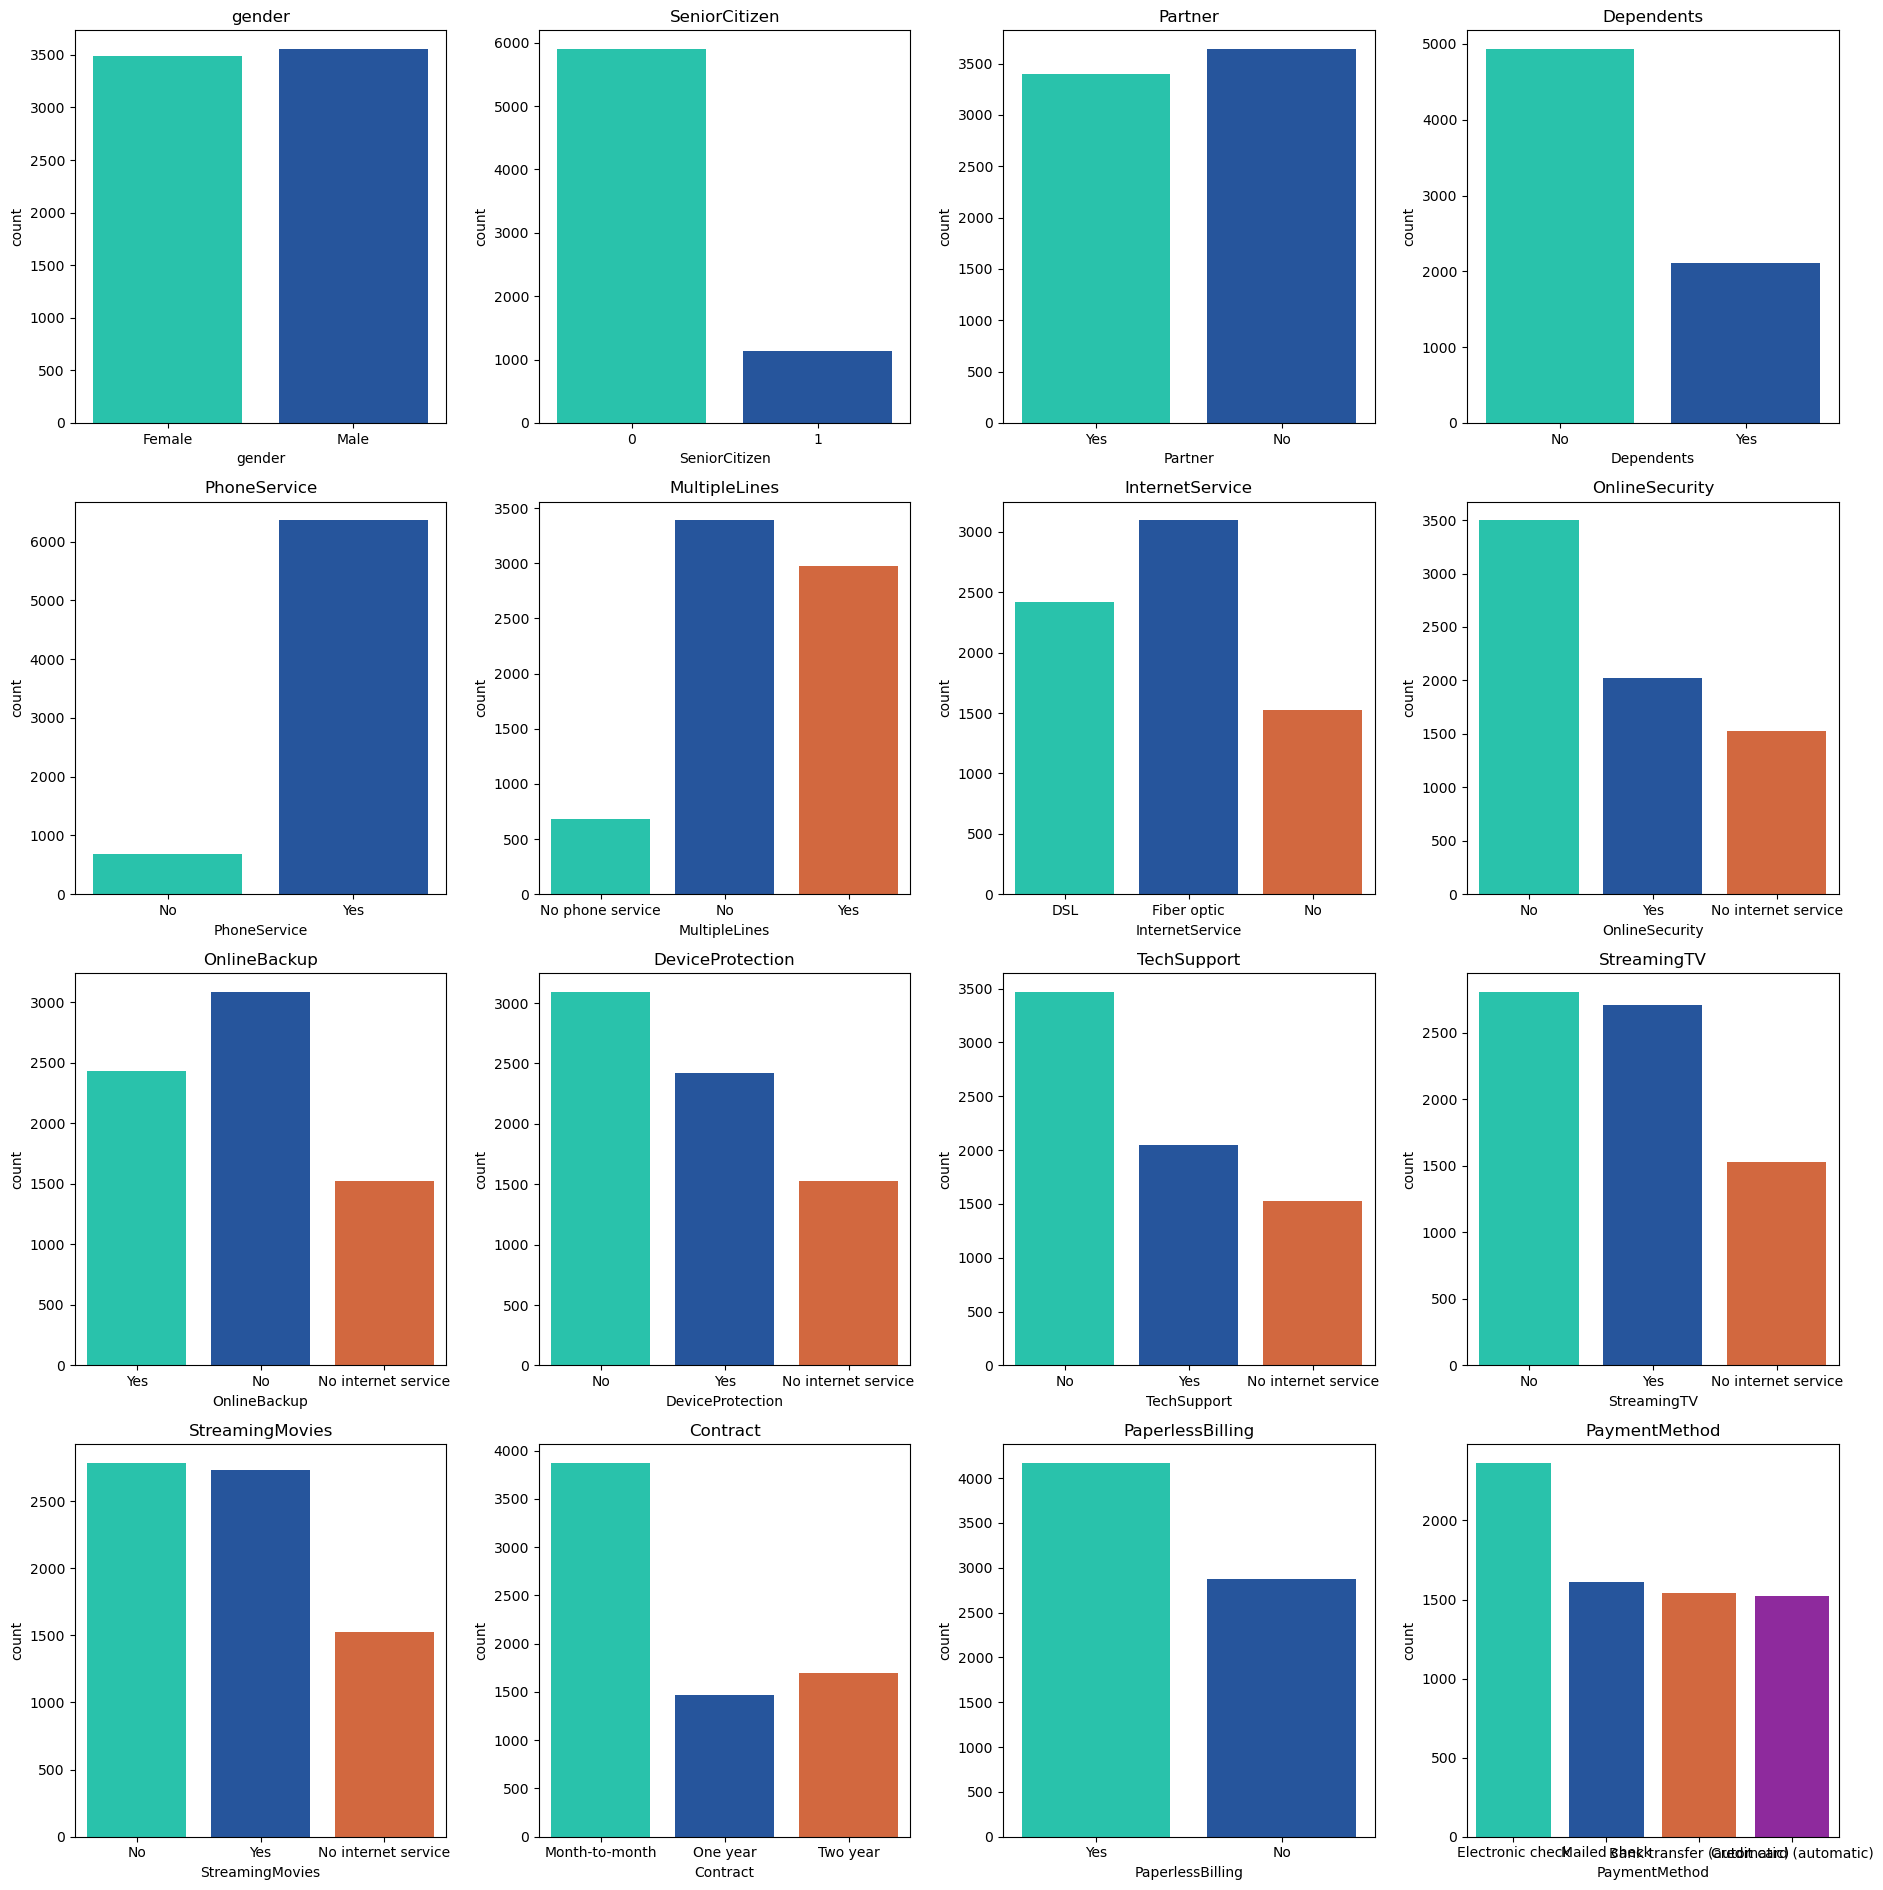

In [33]:
import seaborn as sns

# define colors for each category
colors = ['#0fdbbd', '#1251b0', '#eb5d26', '#9c17b0', 'purple']

ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(19,19))
row, col = 0, 0

for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    sns.countplot(x=categorical_feature, data=df_copy, palette=colors, ax=ax[row, col])
    ax[row, col].set_title(categorical_feature)
    
plt.tight_layout()
plt.show()

# Target variable distribution

In [34]:
# distribution of legit transactions & fraudulent transactions
customerchurn_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

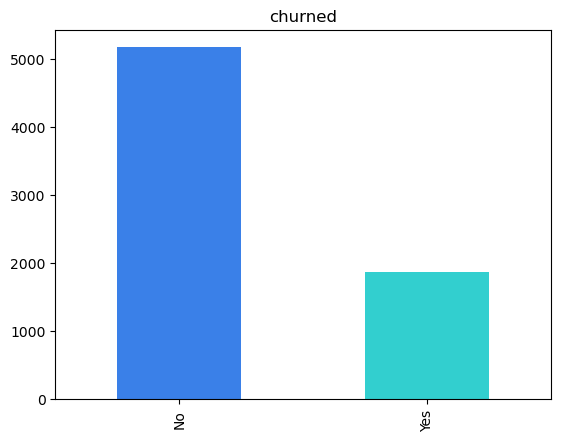

In [35]:
import matplotlib.pyplot as plt

colors = ['#3a80e8', '#32cfcf']
df_copy[target].value_counts().plot(kind='bar', color=colors).set_title('churned')
plt.show()

# On Hot Encoding

In [36]:
df1=pd.get_dummies(data=df_copy,columns=['gender', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)

In [37]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1936.30,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,107.70,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1903.50,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,141.40,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [42]:
df1.describe().transpose().rename(columns={'count': 'cnt', 'mean': 'avg', 'std': 'stdev', 'min': 'min_val', '25%': 'q1', '50%': 'median', '75%': 'q3', 'max': 'max_val'})

,cnt,avg,stdev,min_val,q1,median,q3,max_val
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
TotalCharges,7043.0,2279.581350,2264.729447,0.00,394.0,1393.60,3786.10,8550.00
gender_Male,7043.0,0.504756,0.500013,0.00,0.0,1.00,1.00,1.00
Partner_Yes,7043.0,0.483033,0.499748,0.00,0.0,0.00,1.00,1.00
Dependents_Yes,7043.0,0.299588,0.458110,0.00,0.0,0.00,1.00,1.00
PhoneService_Yes,7043.0,0.903166,0.295752,0.00,1.0,1.00,1.00,1.00
MultipleLines_No phone service,7043.0,0.096834,0.295752,0.00,0.0,0.00,0.00,1.00
MultipleLines_Yes,7043.0,0.421837,0.493888,0.00,0.0,0.00,1.00,1.00


In [45]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

# Rearranging Columns

In [46]:
df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn_Yes']]

In [47]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1936.30,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,107.70,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1903.50,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,141.40,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [48]:
df1.shape

(7043, 31)

In [49]:
from sklearn.impute import SimpleImputer

# The imputer will replace missing values with the mean of the non-missing values for the respective columns

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

# Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [51]:
scaler.fit(df1.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_Yes',axis = 1))

In [52]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Churn_Yes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [53]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(5634, 30) (1409, 30) (5634,) (1409,)


In [54]:
# Convert to DataFrame
df_X = pd.DataFrame(X)

In [55]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X, Y)

ExtraTreesRegressor()

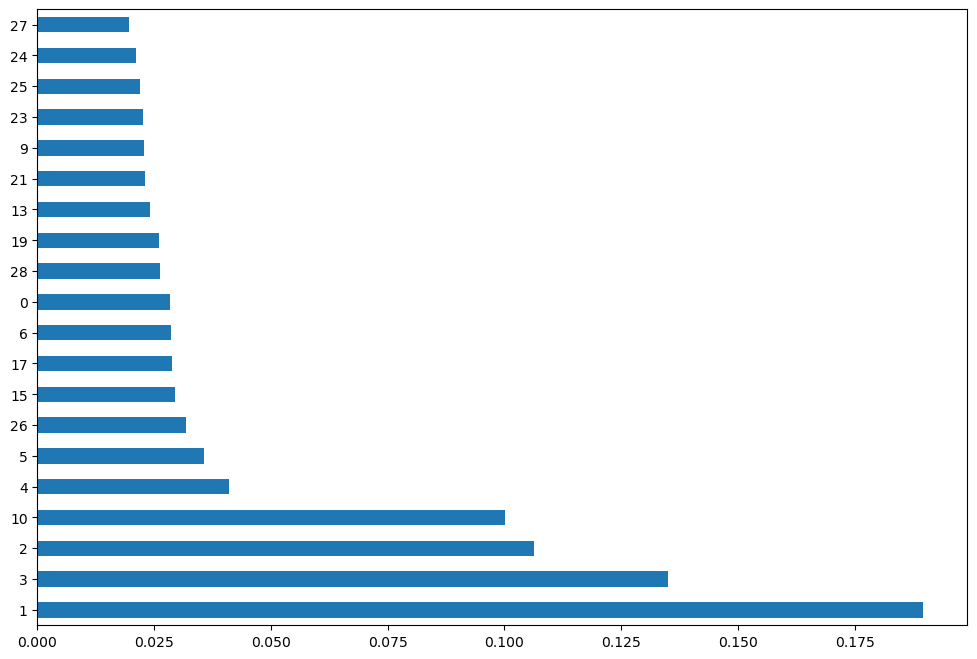

In [56]:
#plot a graph of feature importances for better visualization
plt.figure(figsize = (12,8))

feat_importances = pd.Series(selection.feature_importances_, index=df_X.columns)

feat_importances.nlargest(20).plot(kind='barh')

plt.show()

In [57]:
# Set the maximum number of columns to be displayed to 34
pd.options.display.max_columns = 32

df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1936.30,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,107.70,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1903.50,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,141.40,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [58]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

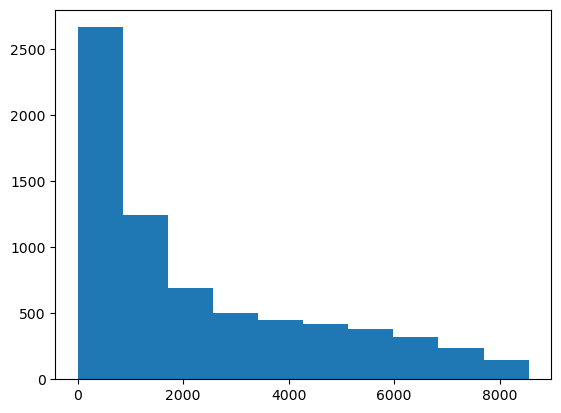

In [59]:
# Examine the distribution of TotalCharges
plt.hist(data = df1, x = 'TotalCharges');

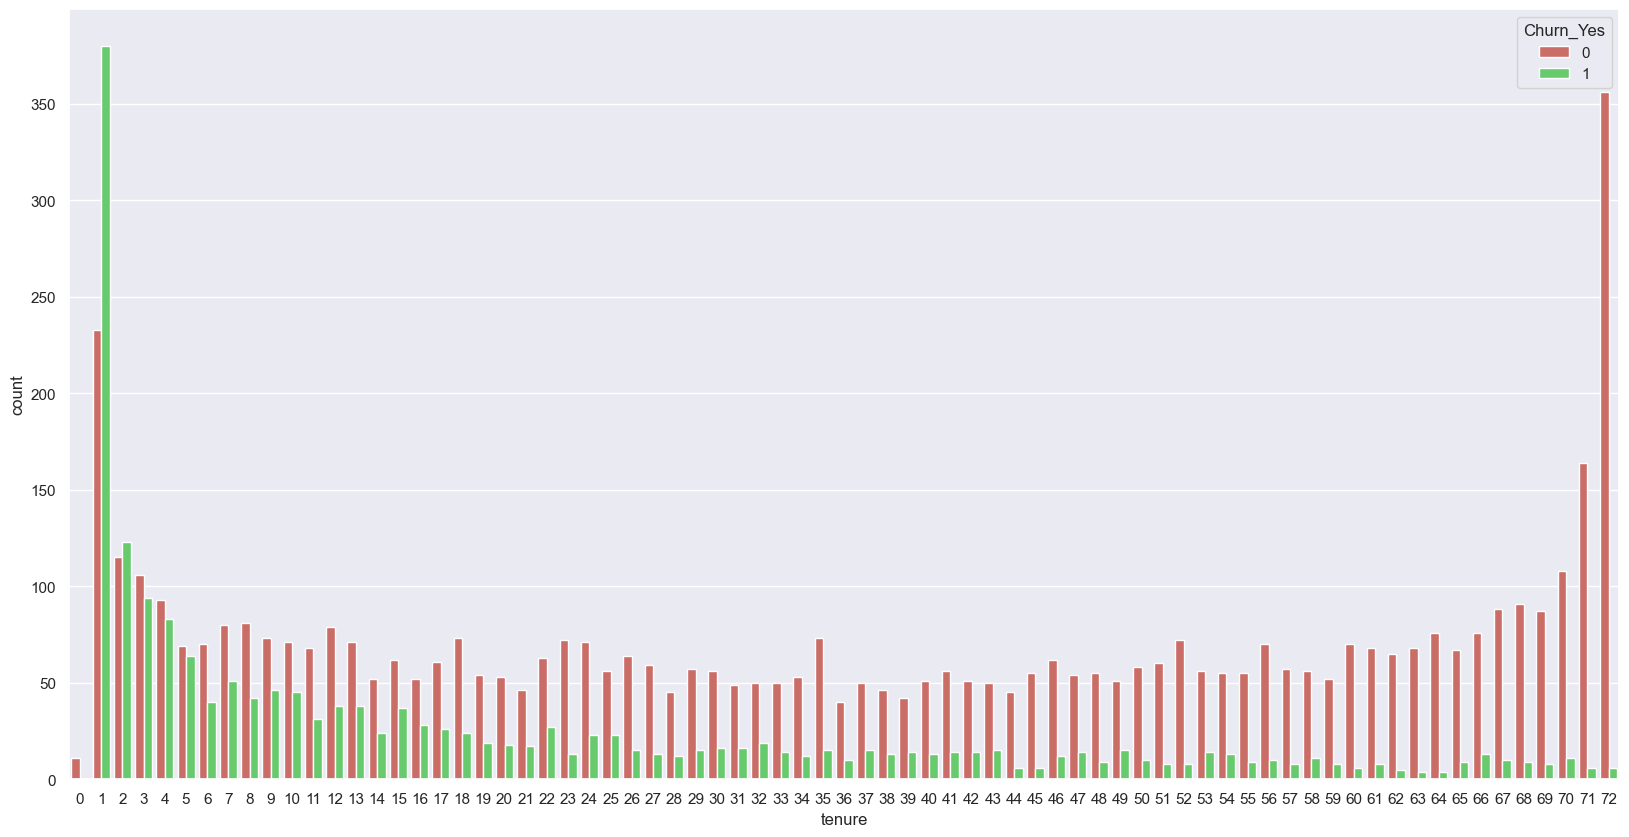

In [60]:
import seaborn as sns

# Plot Tenure Frequency count
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x="tenure", hue="Churn_Yes", data=df1)

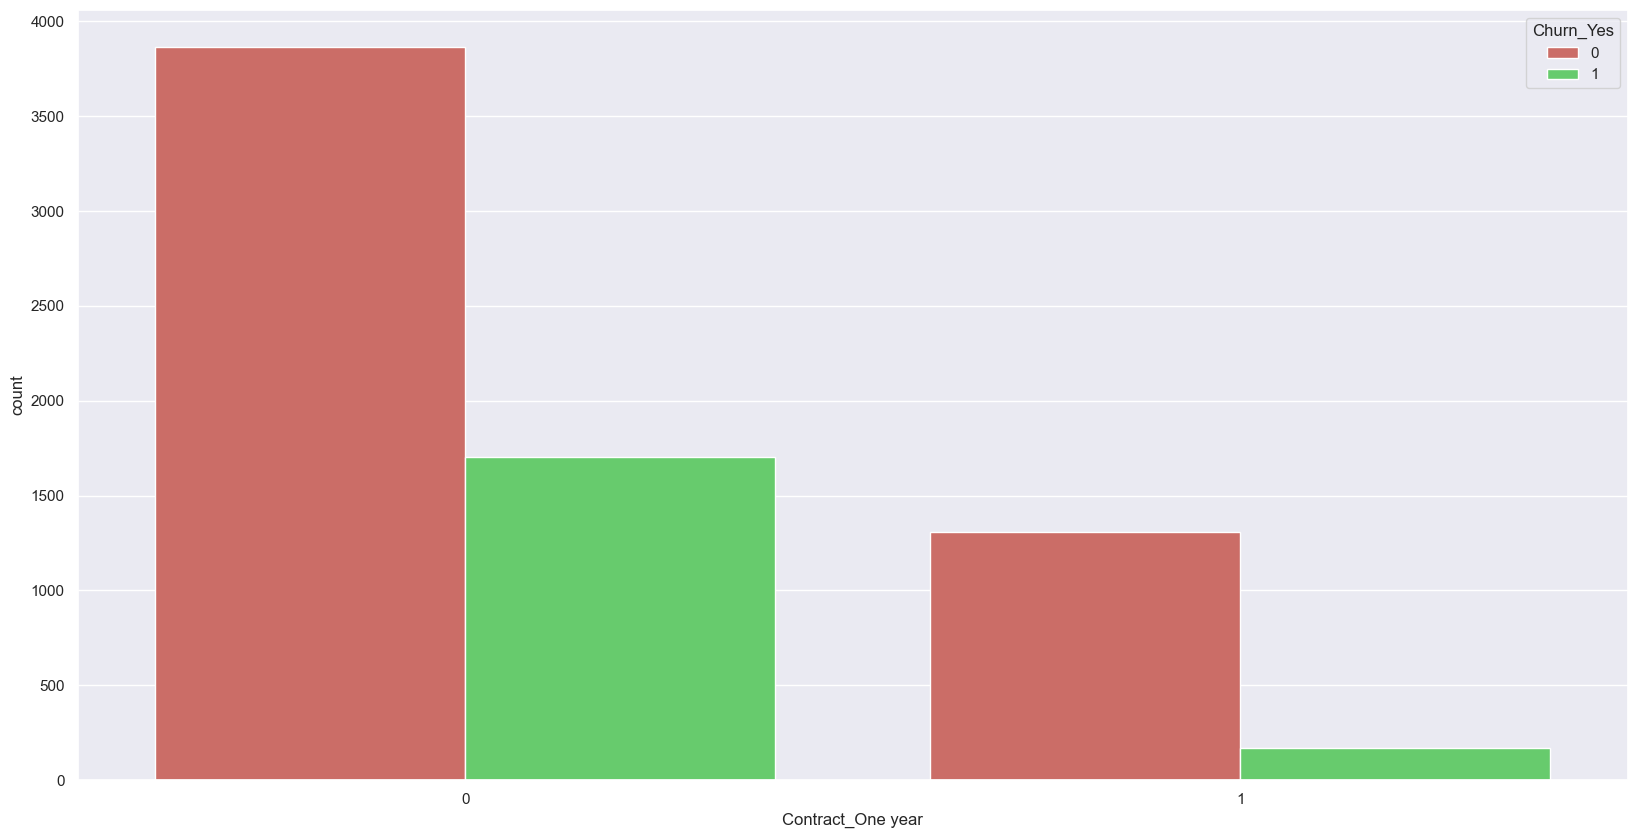

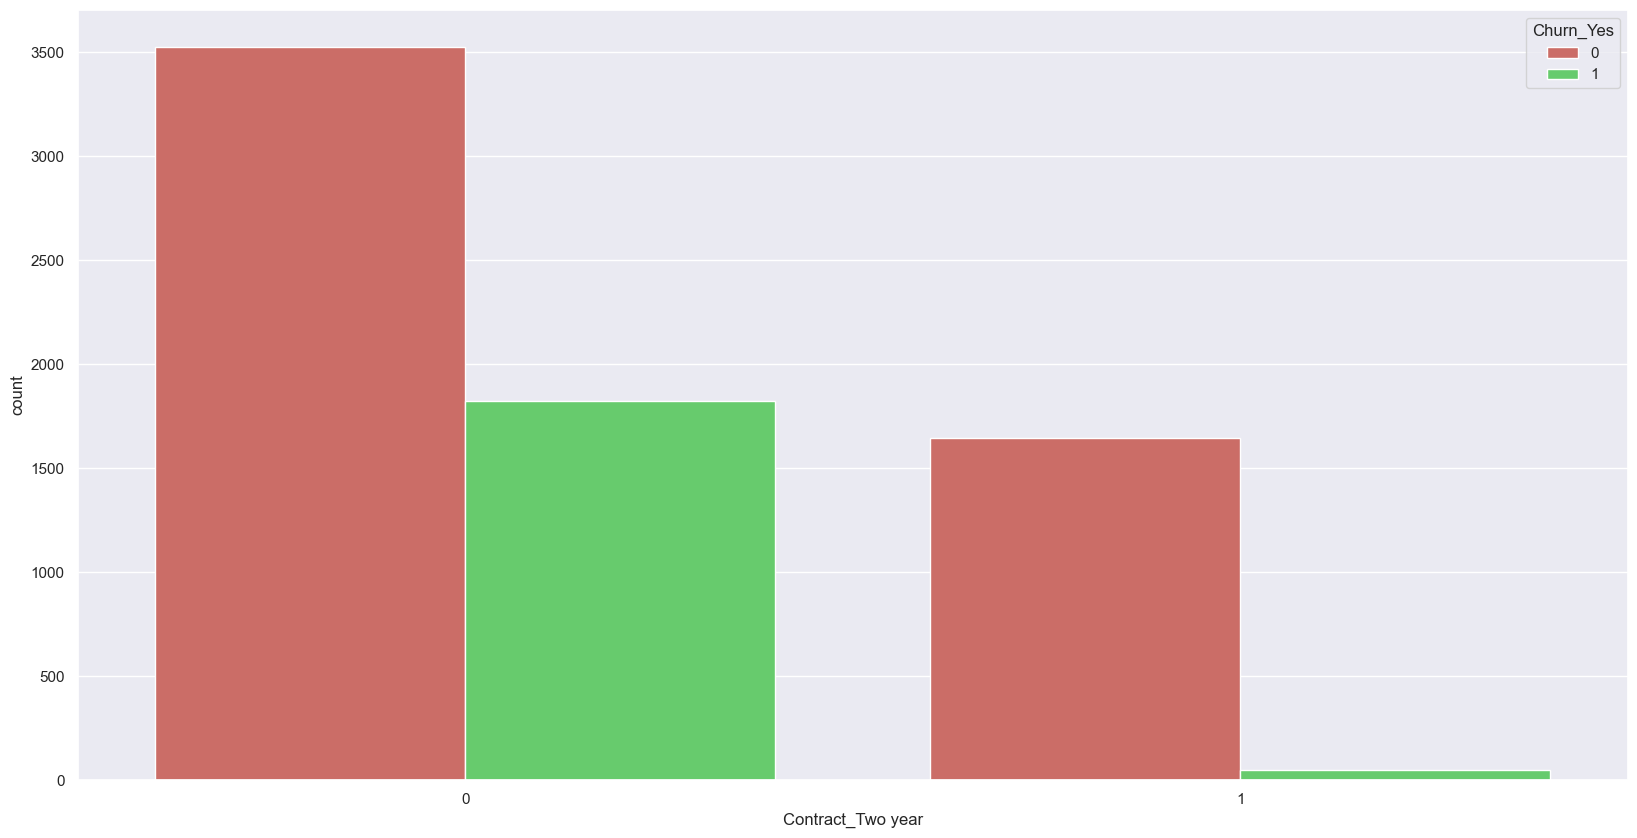

In [61]:
# Plot Tenure Frequency count
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x="Contract_One year", hue="Churn_Yes", data=df1)

# Plot Tenure Frequency count
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x="Contract_Two year", hue="Churn_Yes", data=df1)

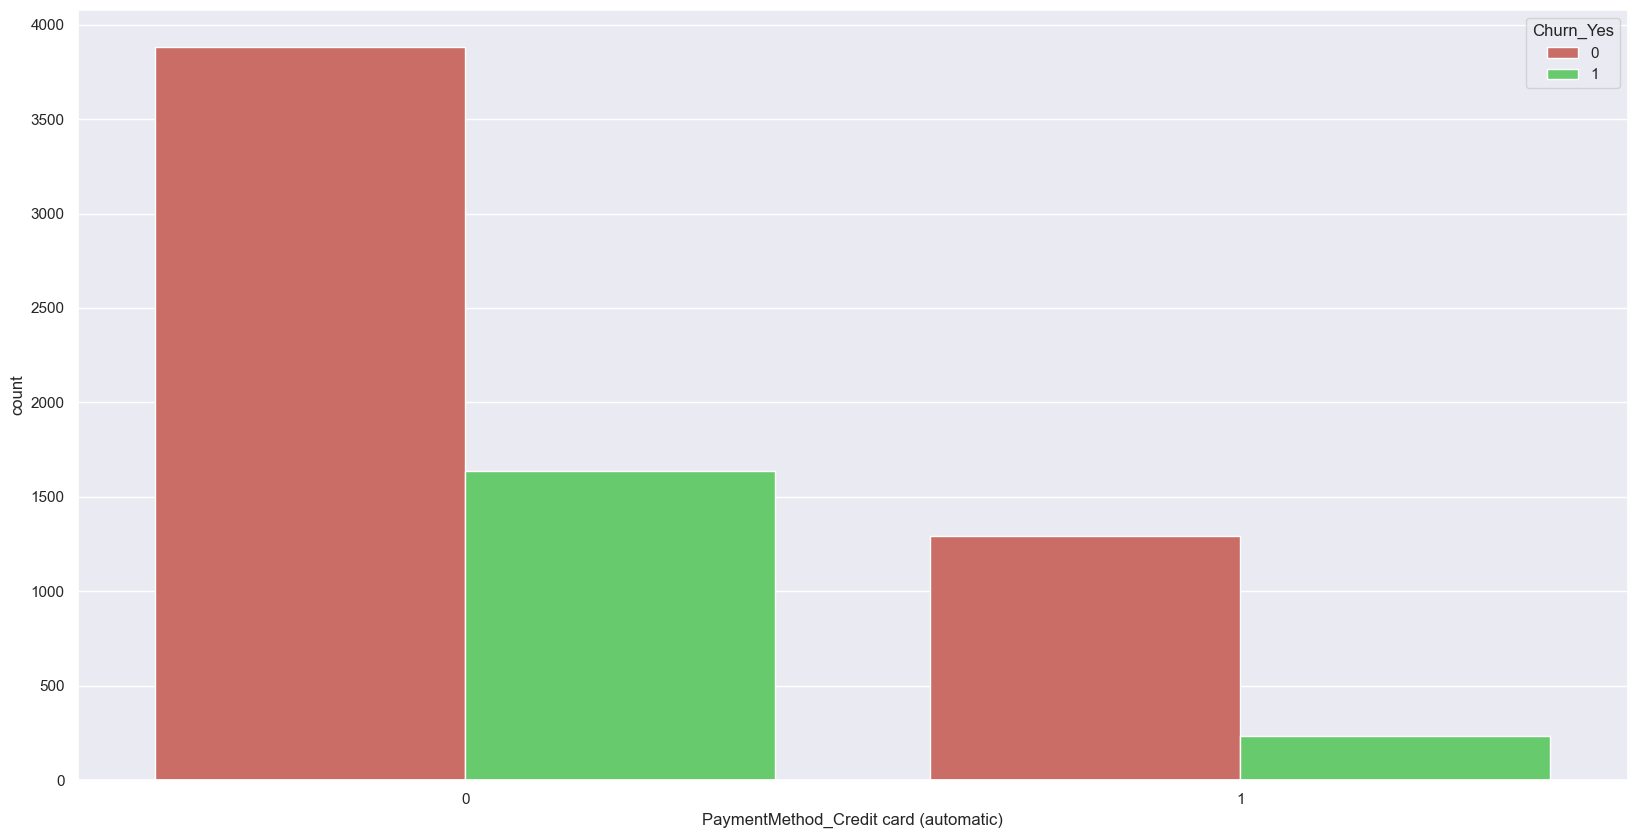

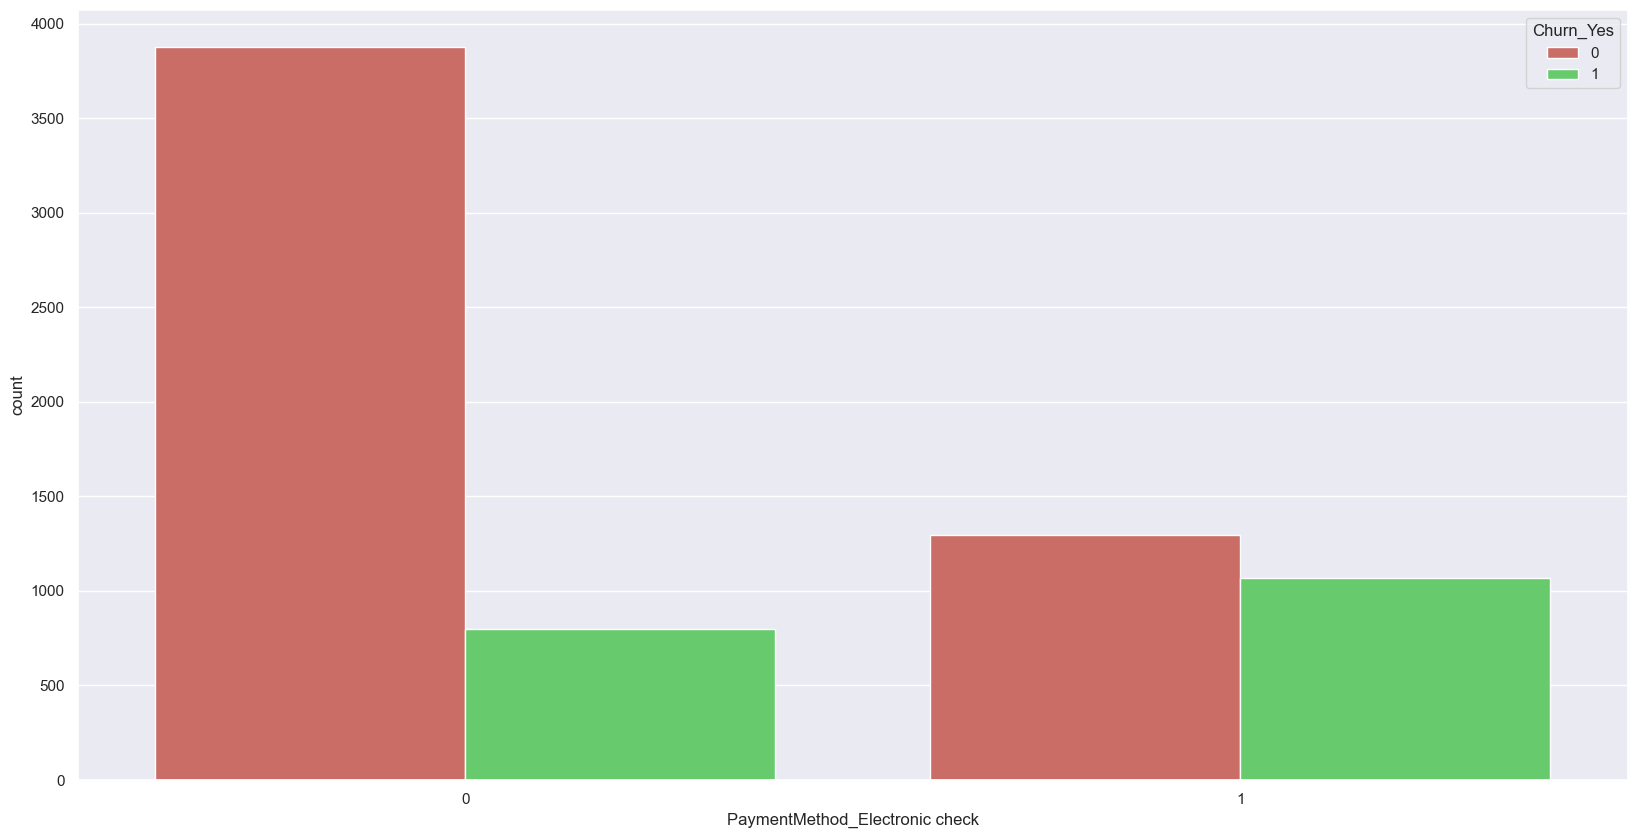

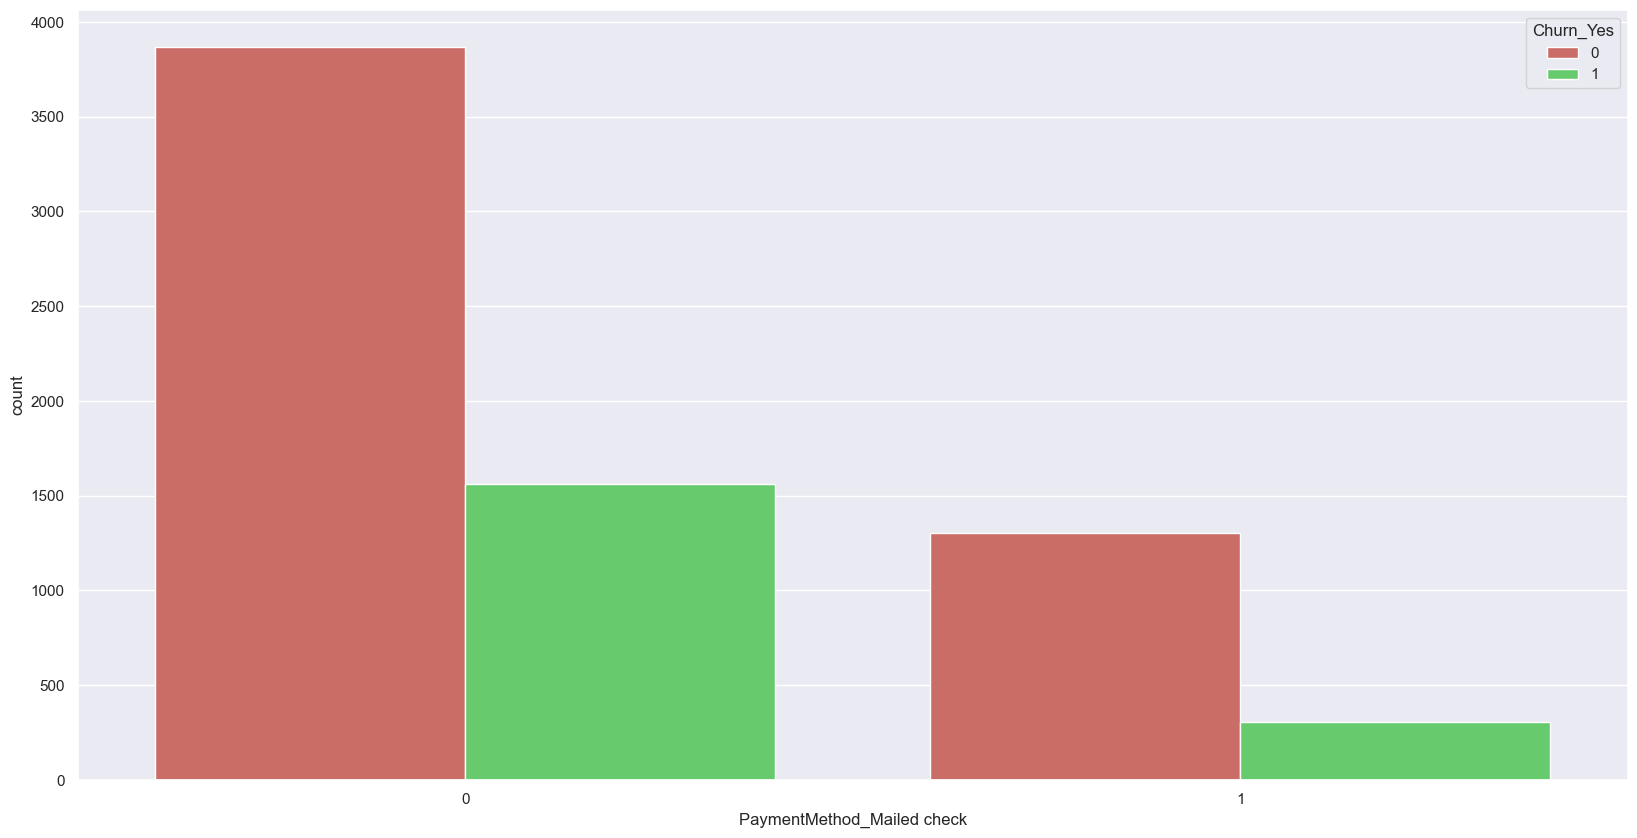

In [62]:
# Plot Tenure Frequency count
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x="PaymentMethod_Credit card (automatic)", hue="Churn_Yes", data=df1)

# Plot Tenure Frequency count
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x="PaymentMethod_Electronic check", hue="Churn_Yes", data=df1)

# Plot Tenure Frequency count
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x="PaymentMethod_Mailed check", hue="Churn_Yes", data=df1)

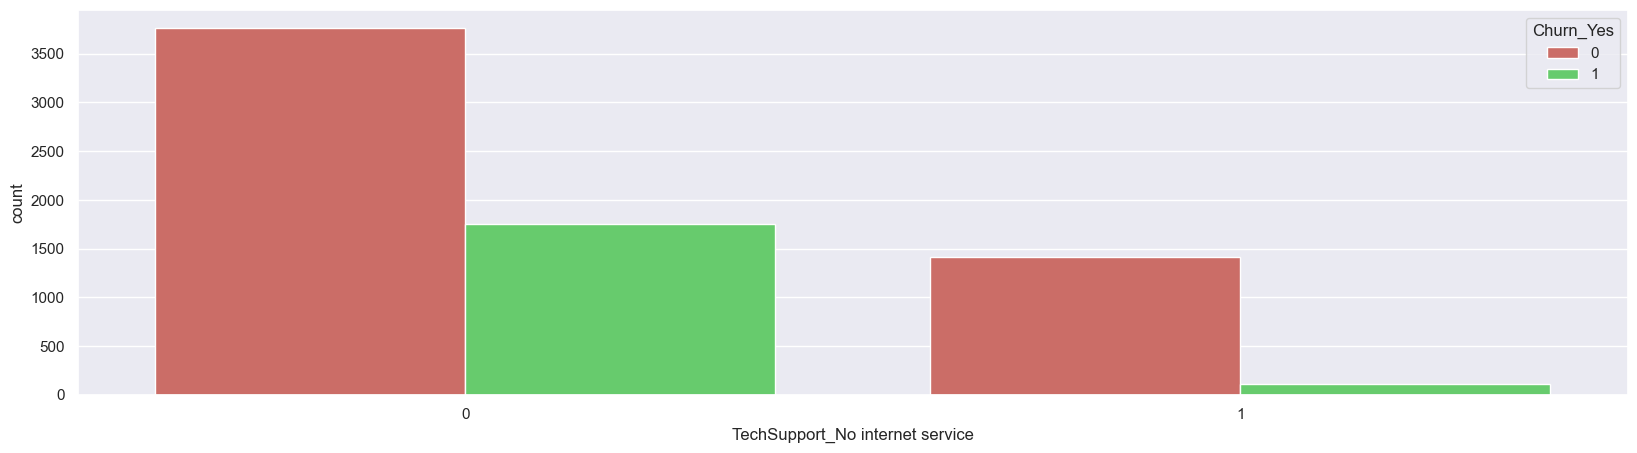

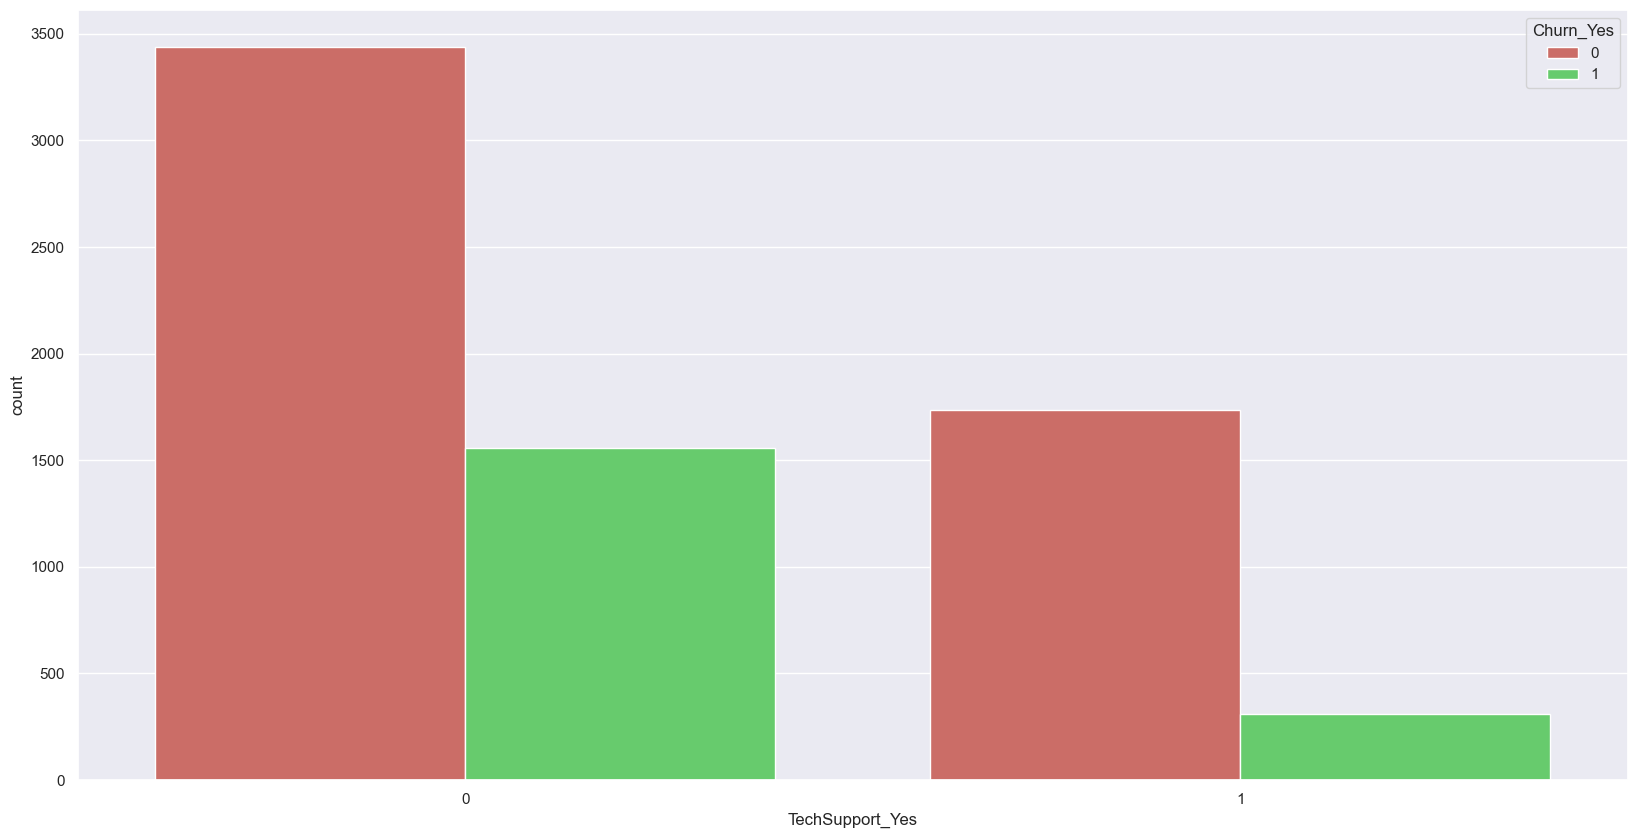

In [63]:
# Plot Tenure Frequency count
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="TechSupport_No internet service", hue="Churn_Yes", data=df1)

# Plot Tenure Frequency count
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x="TechSupport_Yes", hue="Churn_Yes", data=df1)

# LogisticRegression

# Apply LogisticRegression using Sklearn library

In [72]:
import time

# assume X_train is a numpy ndarray of shape (n_samples, n_features)
# and y_train is a numpy ndarray of shape (n_samples,)
X_train_df_n = pd.DataFrame(X_train, columns=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'])

time1 = time.time()
# initialize logistic regression model
lr = LogisticRegression()

# Feature Selection use RFE

In [73]:
from sklearn.feature_selection import RFE

# initialize RFE with logistic regression model and desired number of features
rfe = RFE(lr, n_features_to_select=20)

# fit RFE on training data
rfe.fit(X_train_df_n, Y_train)

# get column names of selected features
selected_feature_names = X_train_df_n.columns[rfe.support_]

In [74]:
selected_feature_names

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [75]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

C:\Users\ketak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(
C:\Users\ketak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


In [76]:
# Train the logistic regression model on the transformed training dataset
lr.fit(X_train_rfe, Y_train)

# Evaluate the model on the transformed testing dataset
score = lr.score(X_test_rfe, Y_test)
# print("Model accuracy: {:.2f}%".format(score * 100))

In [77]:
# Transform the training and testing datasets to include only the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# predict on training and testing data
y_train_pred = lr.predict(X_train_rfe)
y_test_pred = lr.predict(X_test_rfe)

C:\Users\ketak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(
C:\Users\ketak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


In [79]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score,log_loss

# calculate accuracy on training and testing data
train_acc = accuracy_score(Y_train, y_train_pred)
test_acc = accuracy_score(Y_test, y_test_pred)

# Calculate the precision, recall, and F1-score
precision = precision_score(Y_train, y_train_pred)
recall = recall_score(Y_train, y_train_pred)
f1_score = f1_score(Y_train, y_train_pred)


print("Training accuracy : {:.3f}".format(train_acc))
# Print the precision, recall, and F1-score
print('Training Precision: {:.3f}'.format(precision))
print('Training Recall: {:.3f}'.format(recall))
print('Training F1-score: {:.3f}'.format(f1_score))
print("Training classification report : \n",classification_report(Y_train, y_train_pred))
print("Training confusion matrix : \n",confusion_matrix(Y_train, y_train_pred))
print('Training Log loss :', log_loss(Y_train, y_train_pred))
print("\n")
# Calculate the precision, recall, and F1-score
precision = precision_score(Y_test, y_test_pred)
recall = recall_score(Y_test, y_test_pred)
report = classification_report(Y_test, y_test_pred, output_dict=True)
f1_score = report['weighted avg']['f1-score']

# Print the precision, recall, and F1-score
print("Testing accuracy:{:.3f}".format(test_acc))
print('Testing Precision: {:.3f}'.format(precision))
print('Testing Recall: {:.3f}'.format(recall))
print('Testing F1-score: {:.3f}'.format(f1_score))
print("Testing classification report : \n",classification_report(Y_test, y_test_pred))
print("Testing confusion matrix : \n",confusion_matrix(Y_test, y_test_pred))
print('Testing Log loss :', log_loss(Y_test, y_test_pred))

Training accuracy : 0.801
Training Precision: 0.650
Training Recall: 0.542
Training F1-score: 0.591
Training classification report : 
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      4138
           1       0.65      0.54      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.79      5634

Training confusion matrix : 
 [[3702  436]
 [ 685  811]]
Training Log loss : 6.872260731837849


Testing accuracy:0.818
Testing Precision: 0.677
Testing Recall: 0.601
Testing F1-score: 0.815
Testing classification report : 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.

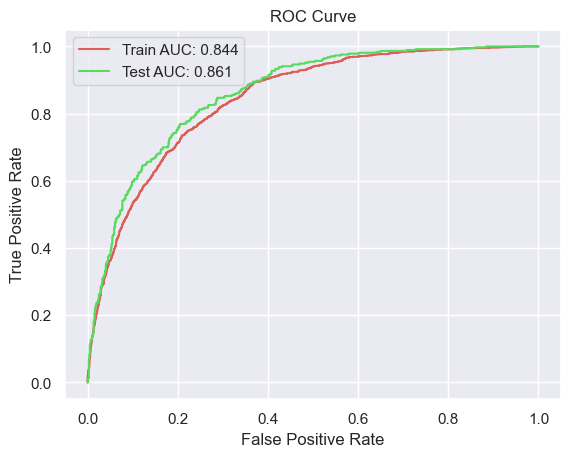

AUC for training dataset: 0.844
AUC for testing dataset: 0.861


In [81]:
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

# obtain predicted probabilities of positive class
train_probs = lr.predict_proba(X_train_rfe)[:,1]
test_probs = lr.predict_proba(X_test_rfe)[:,1]

# calculate false positive rate, true positive rate, and thresholds for train set
train_fpr_lr1, train_tpr_lr1, train_thresholds = roc_curve(Y_train, train_probs)

# calculate false positive rate, true positive rate, and thresholds for test set
test_fpr_lr1, test_tpr_lr1, test_thresholds = roc_curve(Y_test, test_probs)

train_lr1 = roc_auc_score(Y_train, train_probs)
test_lr1 = roc_auc_score(Y_test, test_probs)
# plot ROC curves and AUC for train and test sets
plt.plot(train_fpr_lr1, train_tpr_lr1, label='Train AUC: %.3f' % train_lr1)
plt.plot(test_fpr_lr1, test_tpr_lr1, label='Test AUC: %.3f' % test_lr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print('AUC for training dataset: %.3f' % train_lr1)
print('AUC for testing dataset: %.3f' % test_lr1)

In [82]:
from prettytable import PrettyTable

train_accuracy = 0.801
train_precision = 0.650
train_recall = 0.542
train_f1score = 0.591
train_auc = 0.844
train_confusion_matrix = [[3702, 436], [685, 811]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      4138
           1       0.65      0.54      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.79      5634
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Train Metrics for Logistic Regression using SKlearn libaray"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Train Accuracy", train_accuracy])
train_table.add_row(["Train Precision", train_precision])
train_table.add_row(["Train Recall", train_recall])
train_table.add_row(["Train F1-Score", train_f1score])
train_table.add_row(["Train AUC Score", train_auc])
train_table.add_row(["Train Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Train Classification Report", train_classification_report])

# Print the table
print(train_table)

+--------------------------------------------------------------------------------------+
|             Train Metrics for Logistic Regression using SKlearn libaray              |
+-----------------------------+--------------------------------------------------------+
|            Metric           |                         Value                          |
+-----------------------------+--------------------------------------------------------+
|        Train Accuracy       |                         0.801                          |
|       Train Precision       |                          0.65                          |
|         Train Recall        |                         0.542                          |
|        Train F1-Score       |                         0.591                          |
|       Train AUC Score       |                         0.844                          |
|    Train Confusion Matrix   |               [[3702, 436], [685, 811]]                |
| Train Classificatio

In [83]:
from prettytable import PrettyTable

train_accuracy = 0.818
train_precision = 0.677
train_recall = 0.601
train_f1score = 0.815
train_auc = 0.861
train_confusion_matrix = [[929, 107], [149, 224]]
train_classification_report = """
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409

"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Test Metrics for Logistic Regression using SKlearn libaray"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Test Accuracy", train_accuracy])
train_table.add_row(["Test Precision", train_precision])
train_table.add_row(["Test Recall", train_recall])
train_table.add_row(["Test F1-Score", train_f1score])
train_table.add_row(["Test AUC Score", train_auc])
train_table.add_row(["Test Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Test Classification Report", train_classification_report])

# Print the table
print(train_table)

+------------------------------------------------------------------------------------+
|             Test Metrics for Logistic Regression using SKlearn libaray             |
+----------------------------+-------------------------------------------------------+
|           Metric           |                         Value                         |
+----------------------------+-------------------------------------------------------+
|       Test Accuracy        |                         0.818                         |
|       Test Precision       |                         0.677                         |
|        Test Recall         |                         0.601                         |
|       Test F1-Score        |                         0.815                         |
|       Test AUC Score       |                         0.861                         |
|   Test Confusion Matrix    |                [[929, 107], [149, 224]]               |
| Test Classification Report |             

# Apply LogisticRegression using statsmodels:

In [84]:
import statsmodels.api as sm

# fit the logistic regression model on train dataset using statsmodels
logit_model=sm.Logit(Y_train, X_train)
result=logit_model.fit(maxiter=1000)

         Current function value: 114.163846
         Iterations: 1000


C:\Users\ketak\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [85]:
# convert probabilities to binary predictions
y_train_pred[y_train_pred > 0.5] = 1
y_train_pred[y_train_pred <= 0.5] = 0
y_test_pred[y_test_pred > 0.5] = 1
y_test_pred[y_test_pred <= 0.5] = 0

# calculate accuracy for train and test datasets
train_accuracy = accuracy_score(Y_train, y_train_pred)
# Calculate the precision, recall, and F1-score
precision = precision_score(Y_train, y_train_pred)
recall = recall_score(Y_train, Y_train)

# Print the precision, recall, and F1-score
print("Train Accuracy: {:.3f}".format(train_accuracy))
print('Train Precision: {:.3f}'.format(precision))
print('Train Recall: {:.3f}'.format(recall))
# Assuming y_true and y_pred are your true and predicted labels, respectively
report = classification_report(Y_train, y_train_pred, output_dict=True)
f1_score = report['weighted avg']['f1-score']

print('Train F1-score:{:.3f}'.format(f1_score))
print('Train Log loss :', log_loss(Y_train, y_train_pred))

print('\n')
test_accuracy = accuracy_score(Y_test, y_test_pred)
# Calculate the precision, recall, and F1-score
precision = precision_score(Y_test, y_test_pred)
recall = recall_score(Y_test, y_test_pred)
print("Test Accuracy:{:.3f}".format(test_accuracy))
# Print the precision, recall, and F1-score
print('Test Precision: {:.3f}'.format(precision))
print('Test Recall: {:.3f}'.format(recall))
report = classification_report(Y_test, y_test_pred,output_dict=True)
f1_score = report['weighted avg']['f1-score']

print('Test F1-score:{:.3f}'.format(f1_score))
print('Test Log loss :', log_loss(Y_test, y_test_pred))

Train Accuracy: 0.801
Train Precision: 0.650
Train Recall: 1.000
Train F1-score:0.795
Train Log loss : 6.872260731837849


Test Accuracy:0.818
Test Precision: 0.677
Test Recall: 0.601
Test F1-score:0.815
Test Log loss : 6.275381344231487


In [86]:
train_report = classification_report(Y_train, y_train_pred)
test_report = classification_report(Y_test, y_test_pred)

print("Training Classification Report:\n", train_report)
print("Testing Classification Report:\n", test_report)

Training Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      4138
           1       0.65      0.54      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.79      5634

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



In [87]:
train_matrix = confusion_matrix(Y_train, y_train_pred)
test_matrix = confusion_matrix(Y_test, y_test_pred)

print("Training Confusion Matrix:\n", train_matrix)
print("Testing Confusion Matrix:\n", test_matrix)

Training Confusion Matrix:
 [[3702  436]
 [ 685  811]]
Testing Confusion Matrix:
 [[929 107]
 [149 224]]


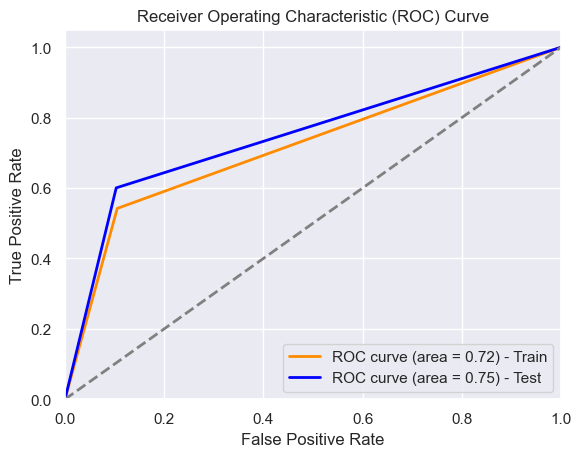

AUC for training dataset: 0.72
AUC for testing dataset: 0.75


In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# compute ROC curve and AUC for training dataset
fpr_train_lr2, tpr_train_lr2, thresholds_train_lr2 = roc_curve(Y_train, y_train_pred)
roc_auc_train_lr2 = auc(fpr_train_lr2, tpr_train_lr2)

# compute ROC curve and AUC for testing dataset
fpr_test_lr2, tpr_test_lr2, thresholds_test_lr2 = roc_curve(Y_test, y_test_pred)
roc_auc_test_lr2 = auc(fpr_test_lr2, tpr_test_lr2)

# plot ROC curves for training and testing datasets
plt.figure()
lw = 2
plt.plot(fpr_train_lr2, tpr_train_lr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f) - Train' % roc_auc_train_lr2)
plt.plot(fpr_test_lr2, tpr_test_lr2, color='blue',
         lw=lw, label='ROC curve (area = %0.2f) - Test' % roc_auc_test_lr2)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

auc_train = roc_auc_score(Y_train, y_train_pred)
print('AUC for training dataset: %.2f' % auc_train)
auc_test = roc_auc_score(Y_test, y_test_pred)
print('AUC for testing dataset: %.2f' % auc_test)

In [90]:
from prettytable import PrettyTable

train_accuracy = 0.801
train_precision = 0.650
train_recall = 1.000
train_f1score = 0.795
train_auc = 0.72
train_confusion_matrix = [[3702, 436], [685, 811]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      4138
           1       0.65      0.54      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.79      5634
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Train Metrics for Logistic Regression using Statsmodel library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Train Accuracy", train_accuracy])
train_table.add_row(["Train Precision", train_precision])
train_table.add_row(["Train Recall", train_recall])
train_table.add_row(["Train F1-Score", train_f1score])
train_table.add_row(["Train AUC Score", train_auc])
train_table.add_row(["Train Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Train Classification Report", train_classification_report])

# Print the table
print(train_table)

+--------------------------------------------------------------------------------------+
|            Train Metrics for Logistic Regression using Statsmodel library            |
+-----------------------------+--------------------------------------------------------+
|            Metric           |                         Value                          |
+-----------------------------+--------------------------------------------------------+
|        Train Accuracy       |                         0.801                          |
|       Train Precision       |                          0.65                          |
|         Train Recall        |                          1.0                           |
|        Train F1-Score       |                         0.795                          |
|       Train AUC Score       |                          0.72                          |
|    Train Confusion Matrix   |               [[3702, 436], [685, 811]]                |
| Train Classificatio

In [91]:
from prettytable import PrettyTable

train_accuracy = 0.818
train_precision = 0.677
train_recall = 0.601
train_f1score = 0.815
train_auc = 0.75
train_confusion_matrix = [[929, 107], [149, 224]]
train_classification_report = """
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409

"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Test Metrics for Logistic Regression using Statsmodel library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Test Accuracy", train_accuracy])
train_table.add_row(["Test Precision", train_precision])
train_table.add_row(["Test Recall", train_recall])
train_table.add_row(["Test F1-Score", train_f1score])
train_table.add_row(["Test AUC Score", train_auc])
train_table.add_row(["Test Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Test Classification Report", train_classification_report])

# Print the table
print(train_table)

+------------------------------------------------------------------------------------+
|           Test Metrics for Logistic Regression using Statsmodel library            |
+----------------------------+-------------------------------------------------------+
|           Metric           |                         Value                         |
+----------------------------+-------------------------------------------------------+
|       Test Accuracy        |                         0.818                         |
|       Test Precision       |                         0.677                         |
|        Test Recall         |                         0.601                         |
|       Test F1-Score        |                         0.815                         |
|       Test AUC Score       |                          0.75                         |
|   Test Confusion Matrix    |                [[929, 107], [149, 224]]               |
| Test Classification Report |             

# DecisionTreeClassifier

# Apply DecisionTreeClassifier using sklearn

In [92]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1936.30,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,107.70,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1903.50,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,141.40,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [93]:
X_new = df1[['tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check']]
X_new

,tenure,MonthlyCharges,TotalCharges,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,DeviceProtection_No internet service,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Electronic check
0,1,29.85,29.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,34,56.95,1936.30,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,2,53.85,107.70,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,45,42.30,1903.50,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,2,70.70,141.40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,2035.20,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0
7039,72,103.20,7430.40,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
7040,11,29.60,325.60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
7041,4,74.40,297.60,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [94]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn_Yes, dtype: uint8

In [95]:
# Step 3: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, train_size=0.8, random_state=100)

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [97]:
# Train the model
dtc = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

In [98]:
# Make predictions on the train and test sets
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

In [99]:
from sklearn.metrics import precision_score,recall_score,f1_score

# Calculate accuracy scores
train_accuracy = accuracy_score(Y_train, y_train_pred)
print("Train Accuracy:",train_accuracy)

# Calculate precision scores
train_precision = precision_score(Y_train, y_train_pred)
print("Train precision scores:",train_precision)

# Calculate recall scores
train_recall = recall_score(Y_train, y_train_pred)
print("Train recall scores:",train_recall)

# Calculate F1 scores
train_f1 = f1_score(Y_train, y_train_pred)
print("Train F1 scores:",train_f1)

# Calculate classification report
train_report = classification_report(Y_train, y_train_pred)
print("Training Classification Report:\n", train_report)

train_matrix = confusion_matrix(Y_train, y_train_pred)
print("Training Confusion Matrix:\n", train_matrix)
print('Training Log loss :', log_loss(Y_train, y_train_pred))

Train Accuracy: 0.7933972310969116
Train precision scores: 0.6813559322033899
Train recall scores: 0.40606060606060607
Train F1 scores: 0.5088607594936708
Training Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      4149
           1       0.68      0.41      0.51      1485

    accuracy                           0.79      5634
   macro avg       0.75      0.67      0.69      5634
weighted avg       0.78      0.79      0.77      5634

Training Confusion Matrix:
 [[3867  282]
 [ 882  603]]
Training Log loss : 7.13584686016176


In [100]:
# Calculate accuracy scores
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("Test Accuracy:",test_accuracy)

# Calculate precision scores
test_precision = precision_score(Y_test, y_test_pred)
print("Test precision scores:",test_precision)

# Calculate recall scores
test_recall = recall_score(Y_test, y_test_pred)
print("Test recall scores:",test_recall)

# Calculate F1 scores
test_f1 = f1_score(Y_test, y_test_pred)
print("Test F1 scores:",test_f1)

# Calculate classification report
test_report = classification_report(Y_test, y_test_pred)
print("Test Classification Report:\n", test_report)

test_matrix = confusion_matrix(Y_test, y_test_pred)
print("Testing Confusion Matrix:\n", test_matrix)
print('Testing Log loss :', log_loss(Y_test, y_test_pred))

Test Accuracy: 0.7792760823278921
Test precision scores: 0.6502057613168725
Test recall scores: 0.4114583333333333
Test F1 scores: 0.503987240829346
Test Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1025
           1       0.65      0.41      0.50       384

    accuracy                           0.78      1409
   macro avg       0.73      0.66      0.68      1409
weighted avg       0.76      0.78      0.76      1409

Testing Confusion Matrix:
 [[940  85]
 [226 158]]
Testing Log loss : 7.623582274378132


Train AUC: 0.7644869194881246
Test AUC: 0.7529344512195122


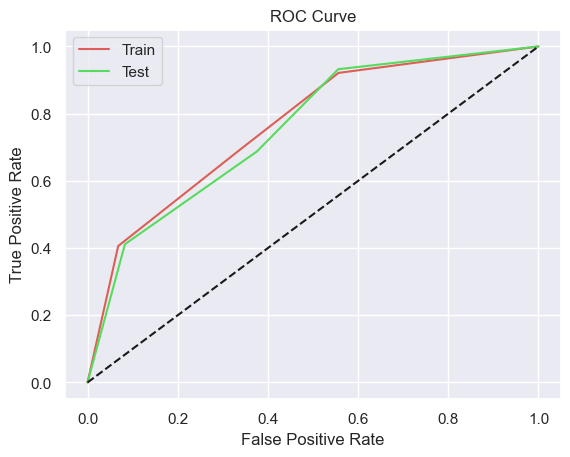

In [101]:
# Calculate probabilities of positive class
train_prob = dtc.predict_proba(X_train)[:,1]
test_prob = dtc.predict_proba(X_test)[:,1]

# Calculate false positive rate, true positive rate and thresholds for ROC curve
fpr_train_dt1, tpr_train_dt1, thresholds_train_dt1 = roc_curve(Y_train, train_prob)
fpr_test_dt1, tpr_test_dt1, thresholds_test_dt1 = roc_curve(Y_test, test_prob)

# Plot ROC curve
plt.plot(fpr_train_dt1, tpr_train_dt1, label='Train')
plt.plot(fpr_test_dt1, tpr_test_dt1, label='Test')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Calculate AUC
auc_train = roc_auc_score(Y_train, train_prob)
auc_test = roc_auc_score(Y_test, test_prob)
print('Train AUC:', auc_train)
print('Test AUC:', auc_test)

In [102]:
from prettytable import PrettyTable

train_accuracy = 0.793
train_precision = 0.681
train_recall = 0.406
train_f1score = 0.508
train_auc =0.76
train_confusion_matrix = [[3867, 282],[ 882,  603]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      4149
           1       0.68      0.41      0.51      1485

    accuracy                           0.79      5634
   macro avg       0.75      0.67      0.69      5634
weighted avg       0.78      0.79      0.77      5634
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Train Metrics for DecisionTreeClassifier using Sklearn library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Train Accuracy", train_accuracy])
train_table.add_row(["Train Precision", train_precision])
train_table.add_row(["Train Recall", train_recall])
train_table.add_row(["Train F1-Score", train_f1score])
train_table.add_row(["Train AUC Score", train_auc])
train_table.add_row(["Train Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Train Classification Report", train_classification_report])

# Print the table
print(train_table)

+--------------------------------------------------------------------------------------+
|            Train Metrics for DecisionTreeClassifier using Sklearn library            |
+-----------------------------+--------------------------------------------------------+
|            Metric           |                         Value                          |
+-----------------------------+--------------------------------------------------------+
|        Train Accuracy       |                         0.793                          |
|       Train Precision       |                         0.681                          |
|         Train Recall        |                         0.406                          |
|        Train F1-Score       |                         0.508                          |
|       Train AUC Score       |                          0.76                          |
|    Train Confusion Matrix   |               [[3867, 282], [882, 603]]                |
| Train Classificatio

In [103]:
from prettytable import PrettyTable
 
train_accuracy = 0.779
train_precision = 0.650
train_recall = 0.411
train_f1score = 0.503
train_auc = 0.75
train_confusion_matrix = [[940,  85],[226, 158]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1025
           1       0.65      0.41      0.50       384

    accuracy                           0.78      1409
   macro avg       0.73      0.66      0.68      1409
weighted avg       0.76      0.78      0.76      1409
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Test Metrics for DecisionTreeClassifier using Sklearn library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Test Accuracy", train_accuracy])
train_table.add_row(["Test Precision", train_precision])
train_table.add_row(["Test Recall", train_recall])
train_table.add_row(["Test F1-Score", train_f1score])
train_table.add_row(["Test AUC Score", train_auc])
train_table.add_row(["Test Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Test Classification Report", train_classification_report])

# Print the table
print(train_table)

+-------------------------------------------------------------------------------------+
|            Test Metrics for DecisionTreeClassifier using Sklearn library            |
+----------------------------+--------------------------------------------------------+
|           Metric           |                         Value                          |
+----------------------------+--------------------------------------------------------+
|       Test Accuracy        |                         0.779                          |
|       Test Precision       |                          0.65                          |
|        Test Recall         |                         0.411                          |
|       Test F1-Score        |                         0.503                          |
|       Test AUC Score       |                          0.75                          |
|   Test Confusion Matrix    |                [[940, 85], [226, 158]]                 |
| Test Classification Report |  

# Apply DecisionTreeClassifier using XGBoost

In [104]:
import xgboost as xgb

# Build the XGBoost Decision Tree model
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)
params = {'max_depth': 3, 'eta': 0.1, 'objective': 'binary:logistic'}
xgb_model = xgb.train(params, dtrain)

# Make predictions
y_pred = xgb_model.predict(dtest)
y_pred = [round(value) for value in y_pred]

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)

In [105]:
# Define the model
model = xgb.XGBClassifier(random_state=42)

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(Y_train, y_train_pred)
print("Train accuracy score:",train_accuracy)

# Calculate confusion matrices
train_cm = confusion_matrix(Y_train, y_train_pred)
print("Train confusion matrice:\n",train_cm)

# Calculate precision scores
train_precision = precision_score(Y_train, y_train_pred)
print("Train precision scores:",train_precision)

# Calculate recall scores
train_recall = recall_score(Y_train, y_train_pred)
print("Train recall scores:",train_recall)

# Calculate F1 scores
train_f1 = f1_score(Y_train, y_train_pred)
print("Train F1 scores:",train_f1)

# Calculate classification report
train_report = classification_report(Y_train, y_train_pred)
print("Training Classification Report:\n", train_report)
print('Training Log loss :', log_loss(Y_train, y_train_pred))

Train accuracy score: 0.9201277955271565
Train confusion matrice:
 [[3979  170]
 [ 280 1205]]
Train precision scores: 0.8763636363636363
Train recall scores: 0.8114478114478114
Train F1 scores: 0.8426573426573426
Training Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      4149
           1       0.88      0.81      0.84      1485

    accuracy                           0.92      5634
   macro avg       0.91      0.89      0.89      5634
weighted avg       0.92      0.92      0.92      5634

Training Log loss : 2.7587123374641367


In [106]:
# Calculate accuracy scores
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("Test accuracy scores:", test_accuracy)

# Calculate confusion matrices
test_cm = confusion_matrix(Y_test, y_test_pred)
print("Test confusion matrices:\n", test_cm)

# Calculate precision scores
test_precision = precision_score(Y_test, y_test_pred)
print("Test precision scores:", test_precision)

# Calculate recall scores
test_recall = recall_score(Y_test, y_test_pred)
print("Test recall scores:", test_recall)

# Calculate F1 scores
test_f1 = f1_score(Y_test, y_test_pred)
print("Test F1 scores:", test_f1)

# Calculate classification report
test_report = classification_report(Y_test, y_test_pred)
print("Test Classification Report:\n", test_report)
print('Test Log loss :', log_loss(Y_test, y_test_pred))

Test accuracy scores: 0.7771469127040455
Test confusion matrices:
 [[887 138]
 [176 208]]
Test precision scores: 0.6011560693641619
Test recall scores: 0.5416666666666666
Test F1 scores: 0.5698630136986301
Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1025
           1       0.60      0.54      0.57       384

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.77      1409

Test Log loss : 7.697151265044233


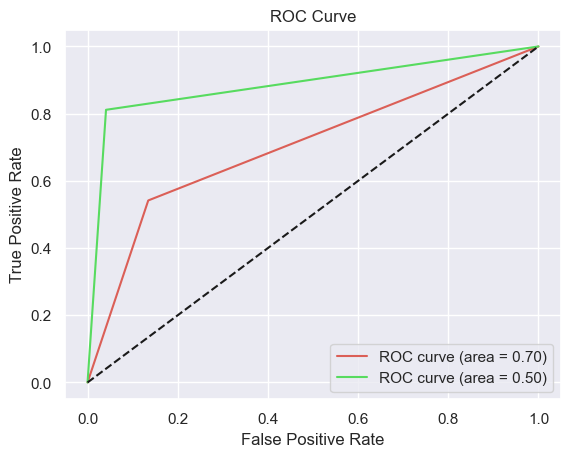

Train AUC: 0.885237041419254
Test AUC: 0.7035162601626016


In [107]:
from sklearn.metrics import roc_curve, auc

# Calculate false positive rate, true positive rate, and threshold for test set
fpr_test_dt2, tpr_test_dt2, test_thresholds_dt2 = roc_curve(Y_test, y_test_pred)

# Calculate area under the ROC curve
test_roc_auc_dt2 = auc(fpr_test_dt2, tpr_test_dt2)

# Calculate false positive rate, true positive rate, and threshold for test set
fpr_train_dt2, tpr_train_dt2, test_thresholds_dt2 = roc_curve(Y_train, y_train_pred)

# Calculate area under the ROC curve
train_roc_auc_dt2 = auc(fpr_train_dt2, fpr_train_dt2)


# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr_test_dt2, tpr_test_dt2, label='ROC curve (area = %0.2f)' % test_roc_auc_dt2)
plt.plot(fpr_train_dt2, tpr_train_dt2, label='ROC curve (area = %0.2f)' % train_roc_auc_dt2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate AUC
auc_train = roc_auc_score(Y_train, y_train_pred)
auc_test = roc_auc_score(Y_test, y_test_pred)
print('Train AUC:', auc_train)
print('Test AUC:', auc_test)

In [108]:
from prettytable import PrettyTable
   
train_accuracy = 0.920
train_precision = 0.876
train_recall = 0.811
train_f1score = 0.842
train_auc =0.669
train_confusion_matrix = [[3979,  170],[280, 1205]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      4149
           1       0.88      0.81      0.84      1485

    accuracy                           0.92      5634
   macro avg       0.91      0.89      0.89      5634
weighted avg       0.92      0.92      0.92      5634

"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Train Metrics for DecisionTreeClassifier using XGBoost library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Train Accuracy", train_accuracy])
train_table.add_row(["Train Precision", train_precision])
train_table.add_row(["Train Recall", train_recall])
train_table.add_row(["Train F1-Score", train_f1score])
train_table.add_row(["Train AUC Score", train_auc])
train_table.add_row(["Train Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Train Classification Report", train_classification_report])

# Print the table
print(train_table)

+--------------------------------------------------------------------------------------+
|            Train Metrics for DecisionTreeClassifier using XGBoost library            |
+-----------------------------+--------------------------------------------------------+
|            Metric           |                         Value                          |
+-----------------------------+--------------------------------------------------------+
|        Train Accuracy       |                          0.92                          |
|       Train Precision       |                         0.876                          |
|         Train Recall        |                         0.811                          |
|        Train F1-Score       |                         0.842                          |
|       Train AUC Score       |                         0.669                          |
|    Train Confusion Matrix   |               [[3979, 170], [280, 1205]]               |
| Train Classificatio

In [109]:
from prettytable import PrettyTable

train_accuracy = 0.777
train_precision = 0.601
train_recall = 0.541
train_f1score = 0.569
train_auc = 0.664
train_confusion_matrix = [[887, 138],[176, 208]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1025
           1       0.60      0.54      0.57       384

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.77      1409

"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Test Metrics for DecisionTreeClassifier using XGBoost library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Test Accuracy", train_accuracy])
train_table.add_row(["Test Precision", train_precision])
train_table.add_row(["Test Recall", train_recall])
train_table.add_row(["Test F1-Score", train_f1score])
train_table.add_row(["Test AUC Score", train_auc])
train_table.add_row(["Test Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Test Classification Report", train_classification_report])

# Print the table
print(train_table)

+-------------------------------------------------------------------------------------+
|            Test Metrics for DecisionTreeClassifier using XGBoost library            |
+----------------------------+--------------------------------------------------------+
|           Metric           |                         Value                          |
+----------------------------+--------------------------------------------------------+
|       Test Accuracy        |                         0.777                          |
|       Test Precision       |                         0.601                          |
|        Test Recall         |                         0.541                          |
|       Test F1-Score        |                         0.569                          |
|       Test AUC Score       |                         0.664                          |
|   Test Confusion Matrix    |                [[887, 138], [176, 208]]                |
| Test Classification Report |  

# RandomForestClassifier

# Scikit-learn library implementation for RandomForestClassifier

In [110]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
# Instantiate the random forest classifier
rfc = RandomForestClassifier(n_estimators=50, min_samples_split=10)
rfc.fit(X_train, Y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=50)

In [111]:
# Predict the labels for train and test sets
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [112]:
# Predict the probabilities for the positive class for train and test sets
y_train_pred_proba = rfc.predict_proba(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)

In [113]:
from sklearn.metrics import roc_curve, auc

# Calculate the applicable accuracy measures for train set
train_accuracy = accuracy_score(Y_train, y_train_pred)
train_precision = precision_score(Y_train, y_train_pred)
train_recall = recall_score(Y_train, y_train_pred)
train_f1_score = f1_score(Y_train, y_train_pred)
train_fpr_rf1, train_tpr_rf1, train_thresholds_rf1 = roc_curve(Y_train, y_train_pred_proba[:,1])
train_roc_auc_rf1 = auc(train_fpr_rf1, train_tpr_rf1)
train_confusion_matrix = confusion_matrix(Y_train, y_train_pred)

# Print the accuracy measures for train set
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1_score)
print("Train AUC Score:", train_roc_auc_rf1)
print("Train Confusion Matrix:\n", train_confusion_matrix)
# Calculate classification report
train_classification_report = classification_report(Y_train, y_train_pred)
print("Train Classification Report:\n", train_classification_report)
print('Train Log loss :', log_loss(Y_train, y_train_pred))

Train Accuracy: 0.8970536031238907
Train Precision: 0.8718159408381265
Train Recall: 0.7144781144781145
Train F1 Score: 0.7853441894892672
Train AUC Score: 0.9668008923492174
Train Confusion Matrix:
 [[3993  156]
 [ 424 1061]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      4149
           1       0.87      0.71      0.79      1485

    accuracy                           0.90      5634
   macro avg       0.89      0.84      0.86      5634
weighted avg       0.90      0.90      0.89      5634

Train Log loss : 3.5556647224436118


In [114]:
# Calculate the applicable accuracy measures for test set
test_accuracy = accuracy_score(Y_test, y_test_pred)
test_precision = precision_score(Y_test, y_test_pred)
test_recall = recall_score(Y_test, y_test_pred)
test_f1_score = f1_score(Y_test, y_test_pred)
test_fpr_rf1, test_tpr_rf1, test_thresholds_rf1 = roc_curve(Y_test, y_test_pred_proba[:,1])
test_roc_auc_rf1 = auc(test_fpr_rf1, test_tpr_rf1)
test_confusion_matrix = confusion_matrix(Y_test, y_test_pred)

# Print the accuracy measures for test set
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test AUC Score:", test_roc_auc_rf1)
print("Test Confusion Matrix:\n", test_confusion_matrix)

# Calculate classification report
test_report = classification_report(Y_test, y_test_pred)
print("Test Classification Report:\n", test_report)
print('Test Log loss :', log_loss(Y_test, y_test_pred))

Test Accuracy: 0.7849538679914834
Test Precision: 0.6285714285714286
Test Recall: 0.515625
Test F1 Score: 0.5665236051502146
Test AUC Score: 0.8192733739837399
Test Confusion Matrix:
 [[908 117]
 [186 198]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1025
           1       0.63      0.52      0.57       384

    accuracy                           0.78      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.78      0.78      1409

Test Log loss : 7.427496664696428


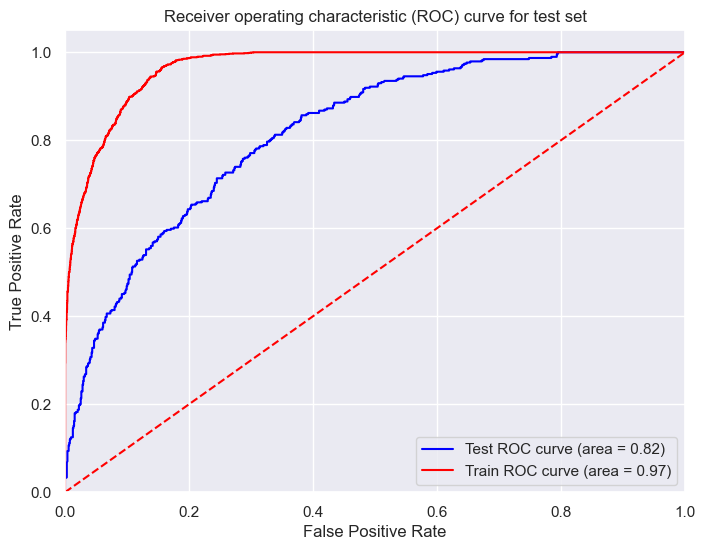

In [115]:
import matplotlib.pyplot as plt

# Plot the ROC curve for test set
plt.figure(figsize=(8, 6))
plt.plot(test_fpr_rf1, test_tpr_rf1, color='blue', label='Test ROC curve (area = %0.2f)' % test_roc_auc_rf1)
plt.plot(train_fpr_rf1, train_tpr_rf1, color='red', label='Train ROC curve (area = %0.2f)' % train_roc_auc_rf1)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve for test set')
plt.legend(loc="lower right")
plt.show()

In [116]:
from prettytable import PrettyTable
    
train_accuracy = 0.899
train_precision = 0.869
train_recall = 0.729
train_f1score = 0.793
train_auc = 0.966
train_confusion_matrix = [[3986,163],[402, 1083]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      4149
           1       0.87      0.73      0.79      1485

    accuracy                           0.90      5634
   macro avg       0.89      0.85      0.86      5634
weighted avg       0.90      0.90      0.90      5634
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Train Metrics for RandomForestClassifier using Scikit-learn library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Train Accuracy", train_accuracy])
train_table.add_row(["Train Precision", train_precision])
train_table.add_row(["Train Recall", train_recall])
train_table.add_row(["Train F1-Score", train_f1score])
train_table.add_row(["Train AUC Score", train_auc])
train_table.add_row(["Train Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Train Classification Report", train_classification_report])

# Print the table
print(train_table)

+--------------------------------------------------------------------------------------+
|         Train Metrics for RandomForestClassifier using Scikit-learn library          |
+-----------------------------+--------------------------------------------------------+
|            Metric           |                         Value                          |
+-----------------------------+--------------------------------------------------------+
|        Train Accuracy       |                         0.899                          |
|       Train Precision       |                         0.869                          |
|         Train Recall        |                         0.729                          |
|        Train F1-Score       |                         0.793                          |
|       Train AUC Score       |                         0.966                          |
|    Train Confusion Matrix   |               [[3986, 163], [402, 1083]]               |
| Train Classificatio

In [117]:
from prettytable import PrettyTable

train_accuracy = 0.784
train_precision = 0.631
train_recall = 0.507
train_f1score = 0.562
train_auc = 0.820
train_confusion_matrix =  [[911,114],[189, 195]]
train_classification_report = """
                  precision    recall  f1-score   support

           0       0.83      0.89      0.86      1025
           1       0.63      0.51      0.56       384

    accuracy                           0.78      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409

"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Test Metrics for RandomForestClassifier using Scikit-learn library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Test Accuracy", train_accuracy])
train_table.add_row(["Test Precision", train_precision])
train_table.add_row(["Test Recall", train_recall])
train_table.add_row(["Test F1-Score", train_f1score])
train_table.add_row(["Test AUC Score", train_auc])
train_table.add_row(["Test Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Test Classification Report", train_classification_report])

# Print the table
print(train_table)

+----------------------------------------------------------------------------------------+
|           Test Metrics for RandomForestClassifier using Scikit-learn library           |
+----------------------------+-----------------------------------------------------------+
|           Metric           |                           Value                           |
+----------------------------+-----------------------------------------------------------+
|       Test Accuracy        |                           0.784                           |
|       Test Precision       |                           0.631                           |
|        Test Recall         |                           0.507                           |
|       Test F1-Score        |                           0.562                           |
|       Test AUC Score       |                            0.82                           |
|   Test Confusion Matrix    |                  [[911, 114], [189, 195]]                 |

# XGBoost library implementation for RandomForestClassifier

In [118]:
import xgboost as xgb

# Instantiate the XGBoost classifier
xgb_clf = xgb.XGBRFClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training data
xgb_clf.fit(X_train, Y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=10, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', predictor=None, random_state=42,
                reg_alpha=None, ...)

In [119]:
# Predict the classes for the training and testing data
train_preds = xgb_clf.predict(X_train)
test_preds = xgb_clf.predict(X_test)

In [120]:
from sklearn.metrics import roc_curve, auc

# Calculate the applicable accuracy measures for train set
train_accuracy = accuracy_score(Y_train, train_preds)
train_precision = precision_score(Y_train, train_preds)
train_recall = recall_score(Y_train, train_preds)
train_f1_score = f1_score(Y_train, train_preds)
train_confusion_matrix = confusion_matrix(Y_train, train_preds)

# Print the accuracy measures for train set
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1_score)
print("Train Confusion Matrix:\n", train_confusion_matrix)
test_report = classification_report(Y_train, train_preds)
print("Train Classification Report:\n", test_report)
print('Train Log loss :', log_loss(Y_train, train_preds))

Train Accuracy: 0.882321618743344
Train Precision: 0.8205928237129485
Train Recall: 0.7084175084175084
Train F1 Score: 0.7603903144199494
Train Confusion Matrix:
 [[3919  230]
 [ 433 1052]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4149
           1       0.82      0.71      0.76      1485

    accuracy                           0.88      5634
   macro avg       0.86      0.83      0.84      5634
weighted avg       0.88      0.88      0.88      5634

Train Log loss : 4.064499939161294


In [121]:
from sklearn.metrics import roc_curve, auc

# Calculate the applicable accuracy measures for train set
test_accuracy = accuracy_score(Y_test, test_preds)
test_precision = precision_score(Y_test, test_preds)
test_recall = recall_score(Y_test, test_preds)
test_f1_score = f1_score(Y_test, test_preds)
test_confusion_matrix = confusion_matrix(Y_test, test_preds)

# Print the accuracy measures for train set
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test Confusion Matrix:\n", test_confusion_matrix)
# Calculate classification report
test_report = classification_report(Y_test, test_preds)
print("Test Classification Report:\n", test_report)
print('Test Log loss :', log_loss(Y_test, test_preds))

Test Accuracy: 0.7821149751596878
Test Precision: 0.6170212765957447
Test Recall: 0.5286458333333334
Test F1 Score: 0.5694249649368864
Test Confusion Matrix:
 [[899 126]
 [181 203]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1025
           1       0.62      0.53      0.57       384

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409

Test Log loss : 7.525553656858613


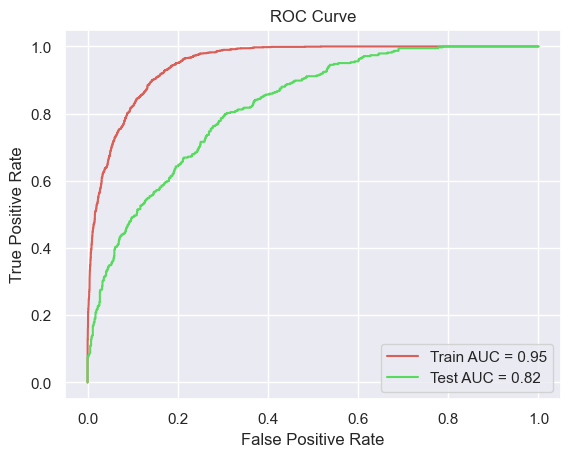

Training AUC score :  0.9507438001773987
Testing AUC score :  0.8228912601626015


In [122]:
# Predict the probabilities of belonging to the positive class for the training and testing data
train_probs = xgb_clf.predict_proba(X_train)[:, 1]
test_probs = xgb_clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate and thresholds for the training and testing data
train_fpr_rf2, train_tpr_rf2, train_thresholds = roc_curve(Y_train, train_probs)
test_fpr_rf2, test_tpr_rf2, test_thresholds = roc_curve(Y_test, test_probs)

# Calculate the AUC for the training and testing data
train_auc_rf2 = auc(train_fpr_rf2, train_tpr_rf2)
test_auc_rf2 = auc(test_fpr_rf2, test_tpr_rf2)

# Plot the ROC curve for the training and testing data
plt.plot(train_fpr_rf2, train_tpr_rf2, label=f'Train AUC = {train_auc_rf2:.2f}')
plt.plot(test_fpr_rf2, test_tpr_rf2, label=f'Test AUC = {test_auc_rf2:.2f}')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print("Training AUC score : ",train_auc_rf2)
print("Testing AUC score : ",test_auc_rf2)

In [123]:
from prettytable import PrettyTable

train_accuracy = 0.882
train_precision = 0.820
train_recall = 0.708
train_f1score = 0.760
train_auc = 0.950
train_confusion_matrix = [[3919,230],[433, 1052]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4149
           1       0.82      0.71      0.76      1485

    accuracy                           0.88      5634
   macro avg       0.86      0.83      0.84      5634
weighted avg       0.88      0.88      0.88      5634
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Train Metrics for RandomForestClassifier using XGBoost library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Train Accuracy", train_accuracy])
train_table.add_row(["Train Precision", train_precision])
train_table.add_row(["Train Recall", train_recall])
train_table.add_row(["Train F1-Score", train_f1score])
train_table.add_row(["Train AUC Score", train_auc])
train_table.add_row(["Train Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Train Classification Report", train_classification_report])

# Print the table
print(train_table)

+--------------------------------------------------------------------------------------+
|            Train Metrics for RandomForestClassifier using XGBoost library            |
+-----------------------------+--------------------------------------------------------+
|            Metric           |                         Value                          |
+-----------------------------+--------------------------------------------------------+
|        Train Accuracy       |                         0.882                          |
|       Train Precision       |                          0.82                          |
|         Train Recall        |                         0.708                          |
|        Train F1-Score       |                          0.76                          |
|       Train AUC Score       |                          0.95                          |
|    Train Confusion Matrix   |               [[3919, 230], [433, 1052]]               |
| Train Classificatio

In [124]:
from prettytable import PrettyTable

train_accuracy =  0.782
train_precision = 0.617
train_recall = 0.528
train_f1score = 0.569
train_auc = 0.822
train_confusion_matrix = [[899, 126],[181, 203]]
train_classification_report = """
                precision    recall  f1-score   support

           0       0.83      0.88      0.85      1025
           1       0.62      0.53      0.57       384

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409

"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Test Metrics for RandomForestClassifier using XGBoost library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Test Accuracy", train_accuracy])
train_table.add_row(["Test Precision", train_precision])
train_table.add_row(["Test Recall", train_recall])
train_table.add_row(["Test F1-Score", train_f1score])
train_table.add_row(["Test AUC Score", train_auc])
train_table.add_row(["Test Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Test Classification Report", train_classification_report])

# Print the table
print(train_table)

+--------------------------------------------------------------------------------------+
|            Test Metrics for RandomForestClassifier using XGBoost library             |
+----------------------------+---------------------------------------------------------+
|           Metric           |                          Value                          |
+----------------------------+---------------------------------------------------------+
|       Test Accuracy        |                          0.782                          |
|       Test Precision       |                          0.617                          |
|        Test Recall         |                          0.528                          |
|       Test F1-Score        |                          0.569                          |
|       Test AUC Score       |                          0.822                          |
|   Test Confusion Matrix    |                 [[899, 126], [181, 203]]                |
| Test Classification

# SVC

# SVM using Scikit-learn:

In [126]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC

# Instantiate the oversampler
oversampler = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, Y_train_resampled = oversampler.fit_resample(X_train, Y_train)

# Train the SVM classifier on the resampled data
svm = SVC(probability=True)
svm.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the resampled training data
y_train_pred = svm.predict(X_train_resampled)

# Calculate the evaluation metrics on the resampled training data
train_accuracy = accuracy_score(Y_train_resampled, y_train_pred)
train_precision = precision_score(Y_train_resampled, y_train_pred)
train_recall = recall_score(Y_train_resampled, y_train_pred)
train_cm = confusion_matrix(Y_train_resampled, y_train_pred)
train_classification_report = classification_report(Y_train_resampled, y_train_pred,output_dict=True)
f1_score = train_classification_report['weighted avg']['f1-score']

print("Training Accuracy: ", train_accuracy)
print("Training Precision: ", train_precision)
print("Training Recall: ", train_recall)
print("Training F1 Score: ", f1_score)
print("Training Confusion Matrix: ")
print(train_cm)
print("Training Classification Report: \n", train_classification_report)
print('Training Log loss :', log_loss(Y_train_resampled, y_train_pred))

print("\n")
# Make predictions on the test data
y_test_pred = svm.predict(X_test)

# Calculate the evaluation metrics on the test data
test_accuracy = accuracy_score(Y_test, y_test_pred)
test_precision = precision_score(Y_test, y_test_pred)
test_recall = recall_score(Y_test, y_test_pred)
test_cm = confusion_matrix(Y_test, y_test_pred)
test_classification_report = classification_report(Y_test, y_test_pred,output_dict=True)
f1_score = test_classification_report['weighted avg']['f1-score']

print("Test Accuracy: ", test_accuracy)
print("Test Precision: ", test_precision)
print("Test Recall: ", test_recall)
print("Test F1 Score: ", f1_score)
print("Test Confusion Matrix: ")
print(test_cm)
print("Test Classification Report: \n", test_classification_report)
print('Test Log loss :', log_loss(Y_test, y_test_pred))

Training Accuracy:  0.6612436731742588
Training Precision:  0.6726006191950464
Training Recall:  0.6283441793203182
Training F1 Score:  0.6608766139241541
Training Confusion Matrix: 
[[2880 1269]
 [1542 2607]]
Training Classification Report: 
 {'0': {'precision': 0.6512890094979648, 'recall': 0.6941431670281996, 'f1-score': 0.6720336016800841, 'support': 4149}, '1': {'precision': 0.6726006191950464, 'recall': 0.6283441793203182, 'f1-score': 0.6497196261682243, 'support': 4149}, 'accuracy': 0.6612436731742588, 'macro avg': {'precision': 0.6619448143465056, 'recall': 0.6612436731742588, 'f1-score': 0.6608766139241542, 'support': 8298}, 'weighted avg': {'precision': 0.6619448143465055, 'recall': 0.6612436731742588, 'f1-score': 0.6608766139241541, 'support': 8298}}
Training Log loss : 11.700351305764382


Test Accuracy:  0.6962384669978708
Test Precision:  0.45985401459854014
Test Recall:  0.65625
Test F1 Score:  0.7097572439377864
Test Confusion Matrix: 
[[729 296]
 [132 252]]
Test Classi

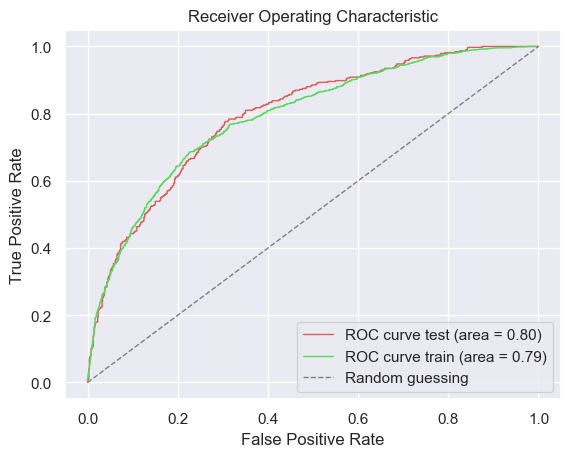

Test AUC score :  0.7962728658536584
Traing AUC score :  0.7914966325908722


In [128]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve, auc

# Calibrate the classifier
calibrated_clf = CalibratedClassifierCV(svm, method='sigmoid')
calibrated_clf.fit(X_train, Y_train)

# Predict the probabilities of the positive class for each sample in the test set
y_prob = calibrated_clf.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold values for the ROC curve
fpr_svm1, tpr_svm1, thresholds_svm1 = roc_curve(Y_test, y_prob)

# Calculate the area under the curve (AUC)
roc_auc_svm1 = auc(fpr_svm1, tpr_svm1)

# Predict the probabilities of the positive class for each sample in the test set
y_prob_train = calibrated_clf.predict_proba(X_train)[:, 1]

# Compute the false positive rate, true positive rate, and threshold values for the ROC curve
fpr_train_svm1, tpr_train_svm1, thresholds_train_svm1 = roc_curve(Y_train, y_prob_train)

# Calculate the area under the curve (AUC)
roc_auc_train_svm1 = auc(fpr_train_svm1, tpr_train_svm1)

# Plot the ROC curve
plt.plot(fpr_svm1, tpr_svm1, lw=1, label='ROC curve test (area = %0.2f)' % roc_auc_svm1)
plt.plot(fpr_train_svm1, tpr_train_svm1, lw=1, label='ROC curve train (area = %0.2f)' % roc_auc_train_svm1)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', label='Random guessing')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print('Test AUC score : ',roc_auc_svm1)
print('Traing AUC score : ',roc_auc_train_svm1)

In [129]:
from prettytable import PrettyTable

train_accuracy = 0.661
train_precision =  0.672
train_recall = 0.628
train_f1score = 0.660
train_auc = 0.791
train_confusion_matrix = [[2880, 1269],[1542, 2607]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.65      0.69      0.67      4149
           1       0.67      0.62      0.64      4149

    accuracy                           0.66      8298
   macro avg       0.66      0.66      0.66      8298
weighted avg       0.66      0.66      0.66      56

"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Train Metrics for SVM using Scikit-learn library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Train Accuracy", train_accuracy])
train_table.add_row(["Train Precision", train_precision])
train_table.add_row(["Train Recall", train_recall])
train_table.add_row(["Train F1-Score", train_f1score])
train_table.add_row(["Train AUC Score", train_auc])
train_table.add_row(["Train Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Train Classification Report", train_classification_report])

# Print the table
print(train_table)

+--------------------------------------------------------------------------------------+
|                   Train Metrics for SVM using Scikit-learn library                   |
+-----------------------------+--------------------------------------------------------+
|            Metric           |                         Value                          |
+-----------------------------+--------------------------------------------------------+
|        Train Accuracy       |                         0.661                          |
|       Train Precision       |                         0.672                          |
|         Train Recall        |                         0.628                          |
|        Train F1-Score       |                          0.66                          |
|       Train AUC Score       |                         0.791                          |
|    Train Confusion Matrix   |              [[2880, 1269], [1542, 2607]]              |
| Train Classificatio

In [130]:
from prettytable import PrettyTable

train_accuracy =  0.696
train_precision =  0.459
train_recall =   0.656
train_f1score = 0.709
train_auc = 0.791
train_confusion_matrix = [[729, 296],[132, 252]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.84      0.71      0.77      1025
           1       0.45      0.65      0.54       384

    accuracy                           0.69      1409
   macro avg       0.65      0.68      0.65      1409
weighted avg       0.74      0.69      0.70      1409
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Test Metrics for SVM using Scikit-learn library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Test Accuracy", train_accuracy])
train_table.add_row(["Test Precision", train_precision])
train_table.add_row(["Test Recall", train_recall])
train_table.add_row(["Test F1-Score", train_f1score])
train_table.add_row(["Test AUC Score", train_auc])
train_table.add_row(["Test Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Test Classification Report", train_classification_report])

# Print the table
print(train_table)

+-------------------------------------------------------------------------------------+
|                   Test Metrics for SVM using Scikit-learn library                   |
+----------------------------+--------------------------------------------------------+
|           Metric           |                         Value                          |
+----------------------------+--------------------------------------------------------+
|       Test Accuracy        |                         0.696                          |
|       Test Precision       |                         0.459                          |
|        Test Recall         |                         0.656                          |
|       Test F1-Score        |                         0.709                          |
|       Test AUC Score       |                         0.791                          |
|   Test Confusion Matrix    |                [[729, 296], [132, 252]]                |
| Test Classification Report |  

# SVM using XGBoost:

In [131]:
# Convert the data into a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Define the SVM parameters
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

# Train the SVM model
num_round = 10
bst = xgb.train(param, dtrain, num_round)

# Make predictions on the training and testing sets
y_train_pred = bst.predict(dtrain)
y_train_pred = [round(pred) for pred in y_train_pred]
y_test_pred = bst.predict(dtest)
y_test_pred = [round(pred) for pred in y_test_pred]

In [132]:
# Calculate accuracy, precision, recall and f1 score for train dataset
train_accuracy = accuracy_score(Y_train, y_train_pred)
train_precision = precision_score(Y_train, y_train_pred)
train_recall = recall_score(Y_train, y_train_pred)
# train_f1_score = f1_score(Y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(Y_train, y_train_pred)
train_classification_report = classification_report(Y_train, y_train_pred)

print('Train Accuracy:', train_accuracy)
print('Train Precision:', train_precision)
print('Train Recall:', train_recall)
# print('Train F1 Score:', train_f1_score)
print('Train Confusion Matrix:\n', train_confusion_matrix)
print('Train Classification Report:\n', train_classification_report)
print('Train Log loss :', log_loss(Y_train, y_train_pred))

Train Accuracy: 0.8084842030528931
Train Precision: 0.6661211129296236
Train Recall: 0.5481481481481482
Train Confusion Matrix:
 [[3741  408]
 [ 671  814]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      4149
           1       0.67      0.55      0.60      1485

    accuracy                           0.81      5634
   macro avg       0.76      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634

Train Log loss : 6.614779191668468


In [133]:
# Calculate accuracy, precision, recall and f1 score for train dataset
test_accuracy = accuracy_score(Y_test, y_test_pred)
test_precision = precision_score(Y_test, y_test_pred)
test_recall = recall_score(Y_test, y_test_pred)
# test_f1_score = f1_score(Y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(Y_test, y_test_pred)
test_classification_report = classification_report(Y_test, y_test_pred)

print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)
# print('Test F1 Score:', test_f1_score)
print('Test Confusion Matrix:\n', test_confusion_matrix)
print('Test Classification Report:\n', test_classification_report)
print('Test Log loss :', log_loss(Y_test, y_test_pred))

Test Accuracy: 0.7856635911994322
Test Precision: 0.6220238095238095
Test Recall: 0.5442708333333334
Test Confusion Matrix:
 [[898 127]
 [175 209]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1025
           1       0.62      0.54      0.58       384

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409

Test Log loss : 7.402989368443337


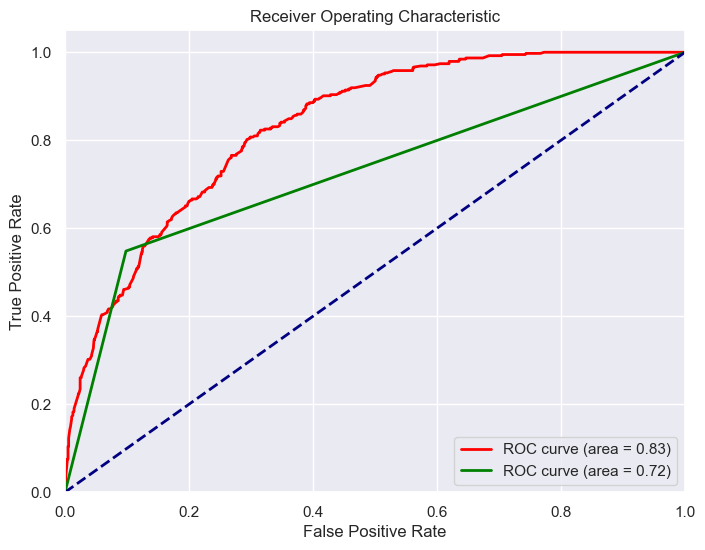

Test AUC score :  0.832600355691057
Traing AUC score :  0.72490559974291


In [134]:
# predict probabilities on the test data
y_test_prob = bst.predict(dtest)

# calculate the false positive rate, true positive rate and thresholds
fpr_test_svm2, tpr_test_svm2, thresholds_svm2 = roc_curve(Y_test, y_test_prob)

# calculate the area under the ROC curve
roc_auc_test_svm2 = auc(fpr_test_svm2, tpr_test_svm2)

# calculate the false positive rate, true positive rate and thresholds
fpr_train_svm2, tpr_train_svm2, thresholds_svm2 = roc_curve(Y_train, y_train_pred)

# calculate the area under the ROC curve
roc_auc_train_svm2 = auc(fpr_train_svm2, tpr_train_svm2)

# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_svm2, tpr_test_svm2, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test_svm2)
plt.plot(fpr_train_svm2, tpr_train_svm2, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train_svm2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print('Test AUC score : ',roc_auc_test_svm2)
print('Traing AUC score : ',roc_auc_train_svm2)

In [135]:
from prettytable import PrettyTable

train_accuracy = 0.808
train_precision = 0.666
train_recall = 0.548
train_f1score = 0.601
train_auc = 0.724
train_confusion_matrix = [[3741,  408],[671,  814]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      4149
           1       0.67      0.55      0.60      1485

    accuracy                           0.81      5634
   macro avg       0.76      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Train Metrics for SVM using XGBoost library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Train Accuracy", train_accuracy])
train_table.add_row(["Train Precision", train_precision])
train_table.add_row(["Train Recall", train_recall])
train_table.add_row(["Train F1-Score", train_f1score])
train_table.add_row(["Train AUC Score", train_auc])
train_table.add_row(["Train Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Train Classification Report", train_classification_report])

# Print the table
print(train_table)

+--------------------------------------------------------------------------------------+
|                     Train Metrics for SVM using XGBoost library                      |
+-----------------------------+--------------------------------------------------------+
|            Metric           |                         Value                          |
+-----------------------------+--------------------------------------------------------+
|        Train Accuracy       |                         0.808                          |
|       Train Precision       |                         0.666                          |
|         Train Recall        |                         0.548                          |
|        Train F1-Score       |                         0.601                          |
|       Train AUC Score       |                         0.724                          |
|    Train Confusion Matrix   |               [[3741, 408], [671, 814]]                |
| Train Classificatio

In [136]:
from prettytable import PrettyTable

train_accuracy =   0.785
train_precision = 0.622
train_recall =  0.544
train_f1score =  0.580
train_auc = 0.832
train_confusion_matrix = [[898, 127],[175, 209]]
train_classification_report = """
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1025
           1       0.62      0.54      0.58       384

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409
"""

# Create table object
train_table = PrettyTable()

# Define table header
train_table.title = "Test Metrics for SVM using XGBoost library"
train_table.field_names = ["Metric", "Value"]

# Add data to the table
train_table.add_row(["Test Accuracy", train_accuracy])
train_table.add_row(["Test Precision", train_precision])
train_table.add_row(["Test Recall", train_recall])
train_table.add_row(["Test F1-Score", train_f1score])
train_table.add_row(["Test AUC Score", train_auc])
train_table.add_row(["Test Confusion Matrix", train_confusion_matrix])
train_table.add_row(["Test Classification Report", train_classification_report])

# Print the table
print(train_table)

+-------------------------------------------------------------------------------------+
|                      Test Metrics for SVM using XGBoost library                     |
+----------------------------+--------------------------------------------------------+
|           Metric           |                         Value                          |
+----------------------------+--------------------------------------------------------+
|       Test Accuracy        |                         0.785                          |
|       Test Precision       |                         0.622                          |
|        Test Recall         |                         0.544                          |
|       Test F1-Score        |                          0.58                          |
|       Test AUC Score       |                         0.832                          |
|   Test Confusion Matrix    |                [[898, 127], [175, 209]]                |
| Test Classification Report |  

# ROC - Curve for combine models

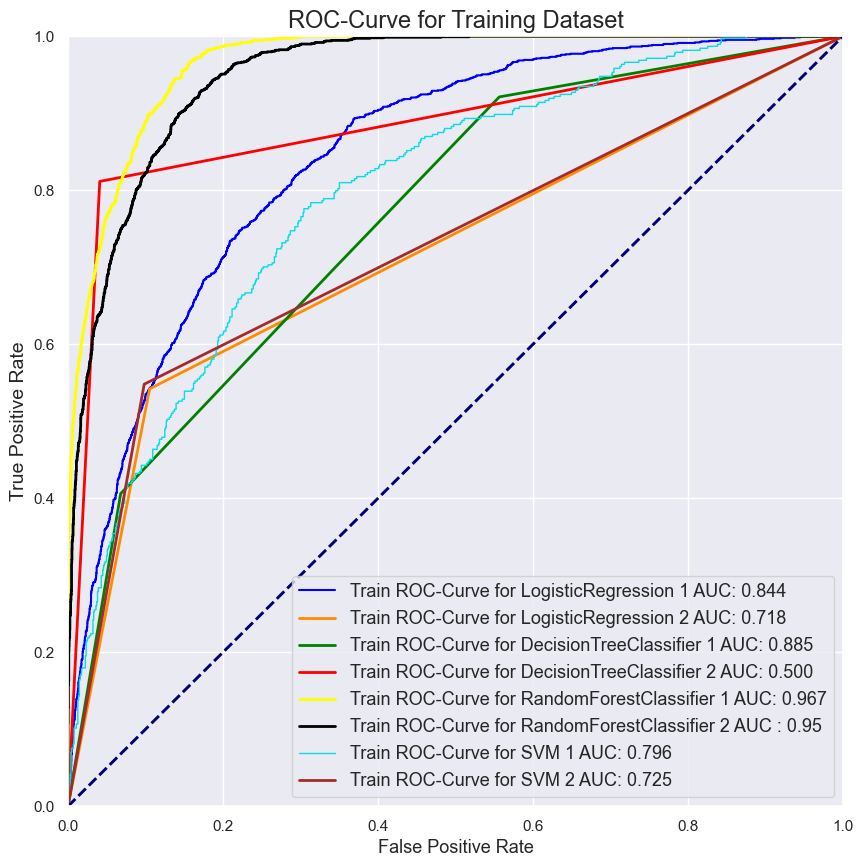

In [137]:
# plot the ROC curves
plt.figure(figsize=(10,10))

# plot ROC curves and AUC for train and test sets
plt.plot(train_fpr_lr1, train_tpr_lr1, color='blue',label='Train ROC-Curve for LogisticRegression 1 AUC: %.3f' % train_lr1)
plt.plot(fpr_train_lr2, tpr_train_lr2, color='darkorange',lw=lw, label='Train ROC-Curve for LogisticRegression 2 AUC: %.3f' % roc_auc_train_lr2)
plt.plot(fpr_train_dt1, tpr_train_dt1,color='green',lw=lw, label='Train ROC-Curve for DecisionTreeClassifier 1 AUC: %.3f' %auc_train)
plt.plot(fpr_train_dt2, tpr_train_dt2,color='red',lw=lw, label='Train ROC-Curve for DecisionTreeClassifier 2 AUC: %.3f' % train_roc_auc_dt2)
plt.plot(train_fpr_rf1, train_tpr_rf1, color='yellow',lw=lw, label='Train ROC-Curve for RandomForestClassifier 1 AUC: %.3f' % train_roc_auc_rf1)
plt.plot(train_fpr_rf2, train_tpr_rf2, color='black',lw=lw,label=f'Train ROC-Curve for RandomForestClassifier 2 AUC : {train_auc_rf2:.2f}')
plt.plot(fpr_svm1, tpr_svm1, color='#05DDE8',lw=1, label='Train ROC-Curve for SVM 1 AUC: %.3f' % roc_auc_svm1)
plt.plot(fpr_train_svm2, tpr_train_svm2, color='brown', lw=2, label='Train ROC-Curve for SVM 2 AUC: %.3f' % roc_auc_train_svm2)

plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC-Curve for Training Dataset', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

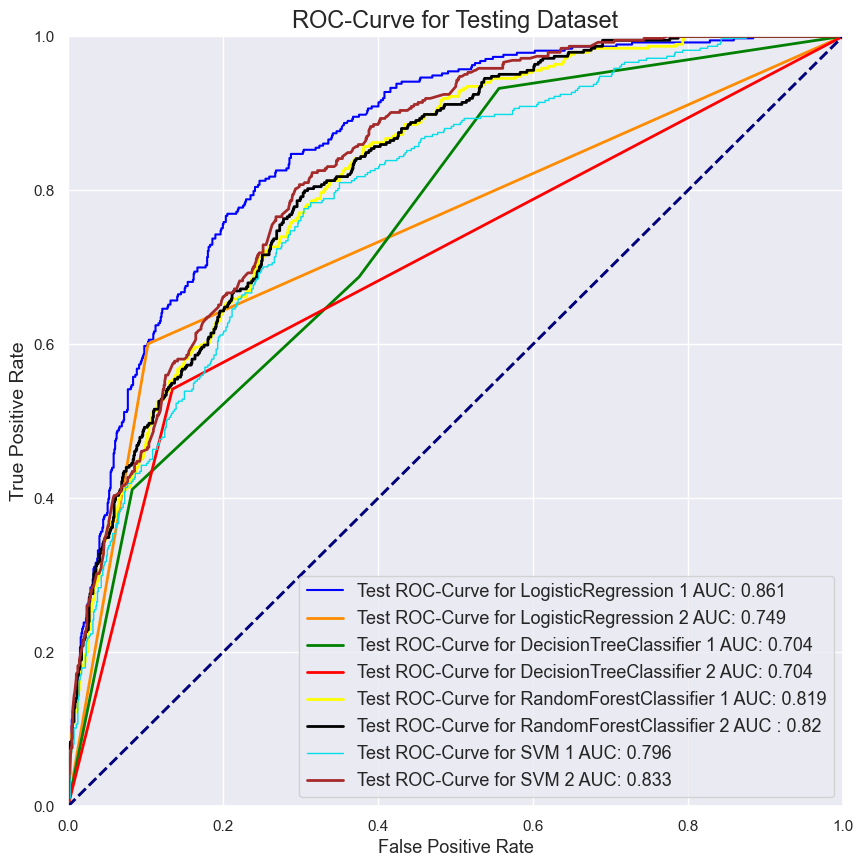

In [138]:
# plot the ROC curves
plt.figure(figsize=(10,10))

# plot ROC curves and AUC for train and test sets
plt.plot(test_fpr_lr1, test_tpr_lr1, color='blue',label='Test ROC-Curve for LogisticRegression 1 AUC: %.3f' % test_lr1)
plt.plot(fpr_test_lr2, tpr_test_lr2, color='darkorange',lw=lw, label='Test ROC-Curve for LogisticRegression 2 AUC: %.3f' % roc_auc_test_lr2)
plt.plot(fpr_test_dt1, tpr_test_dt1, color='green',lw=lw,label='Test ROC-Curve for DecisionTreeClassifier 1 AUC: %.3f' % auc_test)
plt.plot(fpr_test_dt2, tpr_test_dt2,color='red',lw=lw,label='Test ROC-Curve for DecisionTreeClassifier 2 AUC: %.3f' % test_roc_auc_dt2)
plt.plot(test_fpr_rf1, test_tpr_rf1, color='yellow',lw=lw,label='Test ROC-Curve for RandomForestClassifier 1 AUC: %.3f' % test_roc_auc_rf1)
plt.plot(test_fpr_rf2, test_tpr_rf2, color='black',lw=lw,label=f'Test ROC-Curve for RandomForestClassifier 2 AUC : {test_auc_rf2:.2f}')
plt.plot(fpr_svm1, tpr_svm1, color='#05DDE8',lw=1, label='Test ROC-Curve for SVM 1 AUC: %.3f' % roc_auc_svm1)
plt.plot(fpr_test_svm2, tpr_test_svm2, color='brown', lw=2, label='Test ROC-Curve for SVM 2 AUC: %.3f' % roc_auc_test_svm2)

plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC-Curve for Testing Dataset', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

# Model Metrics Comparison for Testing Dataset

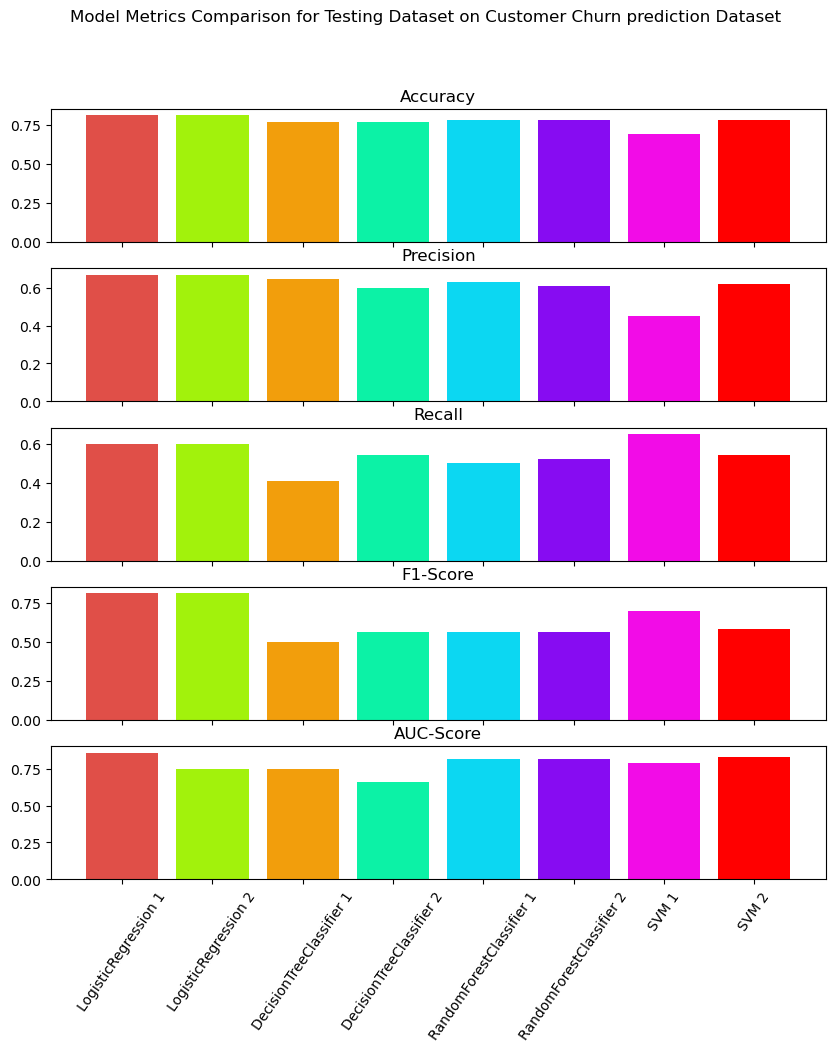

In [2]:
import matplotlib.pyplot as plt
import numpy as np

models = ['LogisticRegression 1', 'LogisticRegression 2', 'DecisionTreeClassifier 1', 'DecisionTreeClassifier 2', 'RandomForestClassifier 1', 'RandomForestClassifier 2'
          ,'SVM 1','SVM 2']
accuracy = np.array([0.81, 0.81, 0.77, 0.77, 0.78, 0.78, 0.69, 0.78])
precision = np.array([0.67, 0.67, 0.65, 0.60, 0.63, 0.61, 0.45, 0.62])
recall = np.array([0.60, 0.60, 0.41, 0.54, 0.50, 0.52, 0.65, 0.54])
f1_score = np.array([0.81, 0.81, 0.50, 0.56, 0.56, 0.56, 0.70, 0.58])
AUC = np.array([0.86, 0.75, 0.75, 0.66, 0.82, 0.82, 0.79, 0.83])

fig, axs = plt.subplots(5, sharex=True, figsize=(10,10))
fig.suptitle('Model Metrics Comparison for Testing Dataset on Customer Churn prediction Dataset')

axs[0].bar(models, accuracy, color=['#e04f48', '#a2f20c', '#f29e0c', '#0cf2a6', '#0cd7f2', '#870cf2', '#f20ce7', 'red'])
axs[0].set_title('Accuracy')

axs[1].bar(models, precision, color=['#e04f48', '#a2f20c', '#f29e0c', '#0cf2a6', '#0cd7f2', '#870cf2', '#f20ce7', 'red'])
axs[1].set_title('Precision')

axs[2].bar(models, recall, color=['#e04f48', '#a2f20c', '#f29e0c', '#0cf2a6', '#0cd7f2', '#870cf2', '#f20ce7', 'red'])
axs[2].set_title('Recall')

axs[3].bar(models, f1_score, color=['#e04f48', '#a2f20c', '#f29e0c', '#0cf2a6', '#0cd7f2', '#870cf2', '#f20ce7', 'red'])
axs[3].set_title('F1-Score')

axs[4].bar(models, AUC, color=['#e04f48', '#a2f20c', '#f29e0c', '#0cf2a6', '#0cd7f2', '#870cf2', '#f20ce7', 'red'])
axs[4].set_title('AUC-Score')

plt.xticks(rotation=55)
plt.show()